In [ ]:
dataset_path = "/content/drive/MyDrive/dataset/"



In [1]:
import os

categories = os.listdir(dataset_path)
print("Available categories:", categories)


NameError: name 'dataset_path' is not defined

In [ ]:
!pip -q install scikit-image tqdm

from google.colab import drive
drive.mount('/content/drive')

import os, imghdr
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image, ImageOps
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.measure import shannon_entropy

plt.rcParams["figure.figsize"] = (10,5)

# Dataset root path
DATASET_PATH = "/content/drive/MyDrive/dataset"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-3765997636.py:6: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import os, imghdr


In [ ]:
import os
import pandas as pd

DATASET_PATH = "/content/drive/MyDrive/dataset"

records = []

def collect_paths(base_folder, is_tampered):
    for root, dirs, files in os.walk(base_folder):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.tif', '.tiff')):
                filepath = os.path.join(root, file)
                scanner_id = os.path.basename(root) if is_tampered==0 else None
                records.append({
                    "filepath": filepath,
                    "scanner_id": scanner_id,
                    "is_tampered": is_tampered
                })

# Authentic scans (scanner folders)
for cat in ["Flatfield", "Official", "Wikipedia"]:
    collect_paths(os.path.join(DATASET_PATH, cat), is_tampered=0)

# Tampered scans
collect_paths(os.path.join(DATASET_PATH, "Tampered images"), is_tampered=1)

df = pd.DataFrame(records)

print(df.head())
print("Total images:", len(df))
print("Unique scanners:", df['scanner_id'].dropna().unique())
print("Tampered count:", (df['is_tampered']==1).sum())


                                            filepath  scanner_id  is_tampered
0  /content/drive/MyDrive/dataset/Flatfield/Canon...  Canon120-1            0
1  /content/drive/MyDrive/dataset/Flatfield/Canon...  Canon120-1            0
2  /content/drive/MyDrive/dataset/Flatfield/Epson...  EpsonV39-1            0
3  /content/drive/MyDrive/dataset/Flatfield/Epson...  EpsonV39-1            0
4  /content/drive/MyDrive/dataset/Flatfield/Epson...  EpsonV39-1            0
Total images: 4862
Unique scanners: ['Canon120-1' 'EpsonV39-1' 'Canon120-2' 'Canon220' 'HP' 'EpsonV370-2'
 'EpsonV39-2' 'Canon9000-1' 'EpsonV550' 'EpsonV370-1' 'Canon9000-2' '150'
 '300']
Tampered count: 271


In [ ]:
import random

# Take 500 random images for EDA
sample_df = df.sample(500, random_state=42).copy()



/tmp/ipython-input-2401341224.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


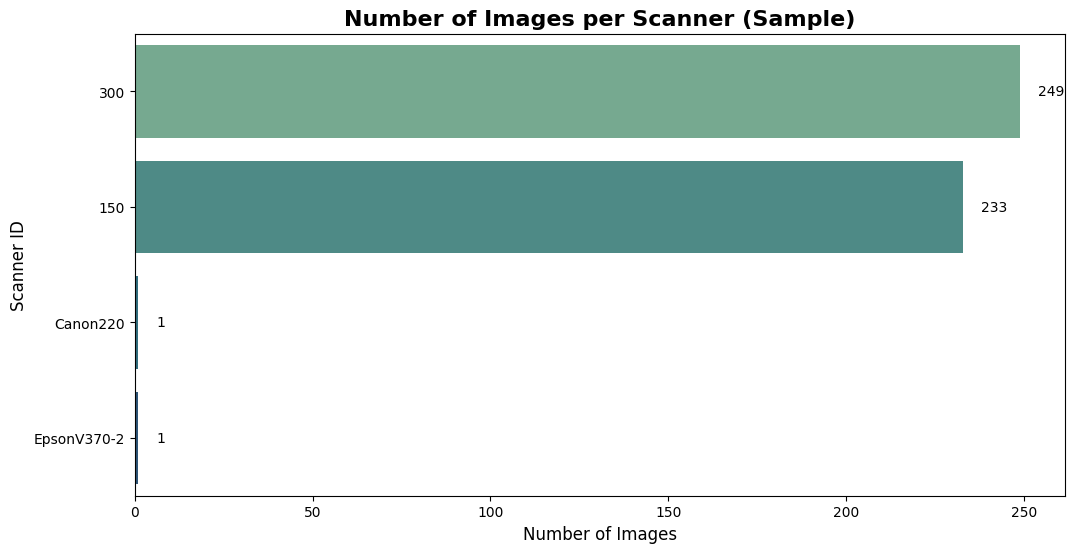

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
ax = sns.countplot(
    y="scanner_id",
    data=sample_df,
    order=sample_df['scanner_id'].value_counts().index,
    palette="crest"
)

# Add count labels on bars
for p in ax.patches:
    ax.text(p.get_width() + 5,        # x position (a bit after bar ends)
            p.get_y() + p.get_height()/2,  # y position (middle of bar)
            int(p.get_width()),
            va='center', fontsize=10, color='black')

plt.title("Number of Images per Scanner (Sample)", fontsize=16, weight="bold")
plt.xlabel("Number of Images", fontsize=12)
plt.ylabel("Scanner ID", fontsize=12)
plt.show()


/tmp/ipython-input-683483634.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="is_tampered", data=sample_df, palette="Set2")
/tmp/ipython-input-683483634.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Original", "Tampered"])


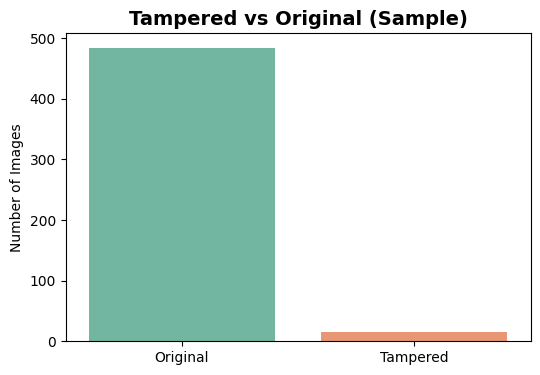

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="is_tampered", data=sample_df, palette="Set2")
ax.set_xticklabels(["Original", "Tampered"])
plt.title("Tampered vs Original (Sample)", fontsize=14, weight="bold")
plt.xlabel("")
plt.ylabel("Number of Images")
plt.show()


In [ ]:
import os
import pandas as pd

DATASET_PATH = "/content/drive/MyDrive/dataset"

records = []

def collect_paths(base_folder, is_tampered):
    for root, dirs, files in os.walk(base_folder):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.tif', '.tiff')):
                filepath = os.path.join(root, file)

                # Instead of last folder, take scanner folder (2nd last directory)
                parts = os.path.normpath(filepath).split(os.sep)
                scanner_id = parts[-2] if is_tampered==0 else None

                records.append({
                    "filepath": filepath,
                    "scanner_id": scanner_id,
                    "is_tampered": is_tampered
                })

# Authentic scans
for cat in ["Flatfield", "Official", "Wikipedia"]:
    collect_paths(os.path.join(DATASET_PATH, cat), is_tampered=0)

# Tampered scans
collect_paths(os.path.join(DATASET_PATH, "Tampered images"), is_tampered=1)

df = pd.DataFrame(records)

print("Unique scanners:", df['scanner_id'].dropna().unique())


Unique scanners: ['Canon120-1' 'EpsonV39-1' 'Canon120-2' 'Canon220' 'HP' 'EpsonV370-2'
 'EpsonV39-2' 'Canon9000-1' 'EpsonV550' 'EpsonV370-1' 'Canon9000-2' '150'
 '300']


/tmp/ipython-input-605382052.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_tampered", y="filesize_kb", data=sample_df, palette="Set3")


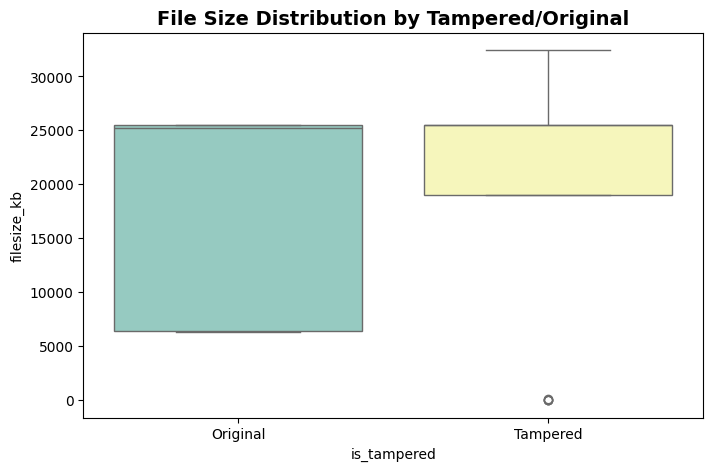

In [ ]:
from PIL import Image
import os

# add width, height, size for sample
widths, heights, sizes = [], [], []
for path in sample_df['filepath']:
    try:
        with Image.open(path) as img:
            widths.append(img.width)
            heights.append(img.height)
    except:
        widths.append(None)
        heights.append(None)
    sizes.append(os.path.getsize(path)/1024)  # KB

sample_df['width'] = widths
sample_df['height'] = heights
sample_df['filesize_kb'] = sizes

# Boxplot of file sizes
plt.figure(figsize=(8,5))
sns.boxplot(x="is_tampered", y="filesize_kb", data=sample_df, palette="Set3")
plt.xticks([0,1], ["Original","Tampered"])
plt.title("File Size Distribution by Tampered/Original", fontsize=14, weight="bold")
plt.show()


In [ ]:
# Remove resolution folders (150 and 300) from scanner_id
df = df[~df['scanner_id'].isin(['150','300'])].reset_index(drop=True)

print("Unique scanners:", df['scanner_id'].unique())
print("Total images after cleanup:", len(df))


Unique scanners: ['Canon120-1' 'EpsonV39-1' 'Canon120-2' 'Canon220' 'HP' 'EpsonV370-2'
 'EpsonV39-2' 'Canon9000-1' 'EpsonV550' 'EpsonV370-1' 'Canon9000-2' None]
Total images after cleanup: 294


/tmp/ipython-input-3375396542.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


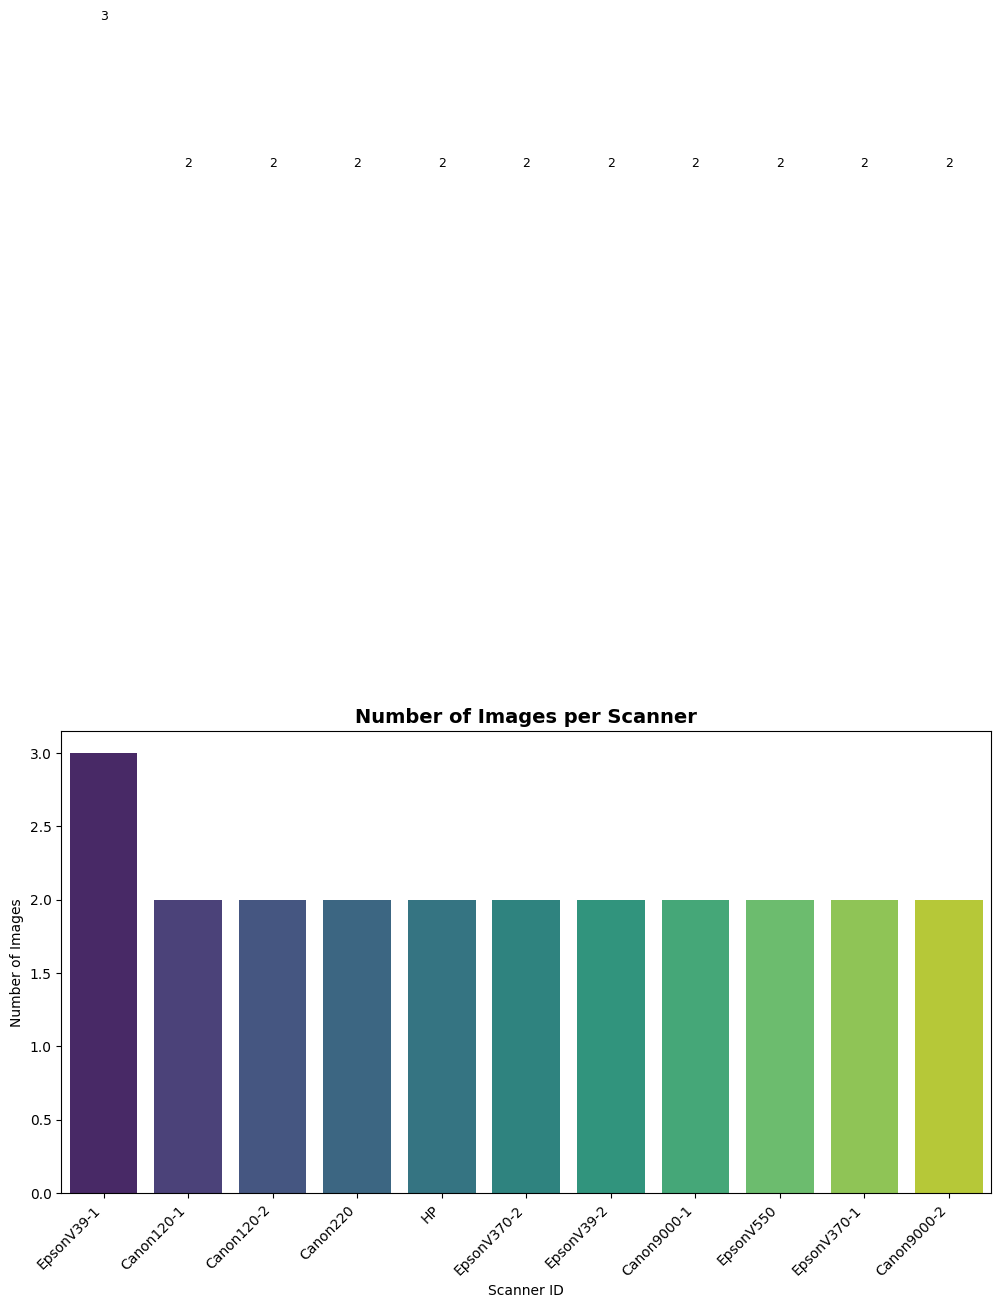

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count images per scanner
scanner_counts = df['scanner_id'].value_counts()

plt.figure(figsize=(12,6))
ax = sns.barplot(
    x=scanner_counts.index,
    y=scanner_counts.values,
    palette="viridis"
)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add integer counts on top of bars
for i, v in enumerate(scanner_counts.values):
    ax.text(i, v + 5, str(int(v)), ha='center', fontsize=9)  # <<< convert to int

plt.title("Number of Images per Scanner", fontsize=14, weight="bold")
plt.xlabel("Scanner ID")
plt.ylabel("Number of Images")
plt.show()


In [ ]:
scanner_counts = df['scanner_id'].value_counts()
print(scanner_counts)


scanner_id
EpsonV39-1     3
Canon120-1     2
Canon120-2     2
Canon220       2
HP             2
EpsonV370-2    2
EpsonV39-2     2
Canon9000-1    2
EpsonV550      2
EpsonV370-1    2
Canon9000-2    2
Name: count, dtype: int64


In [ ]:
# Check scanner counts in the full dataset
print(df['scanner_id'].value_counts())


scanner_id
EpsonV39-1     3
Canon120-1     2
Canon120-2     2
Canon220       2
HP             2
EpsonV370-2    2
EpsonV39-2     2
Canon9000-1    2
EpsonV550      2
EpsonV370-1    2
Canon9000-2    2
Name: count, dtype: int64


In [ ]:
scanner_counts = df['scanner_id'].value_counts()


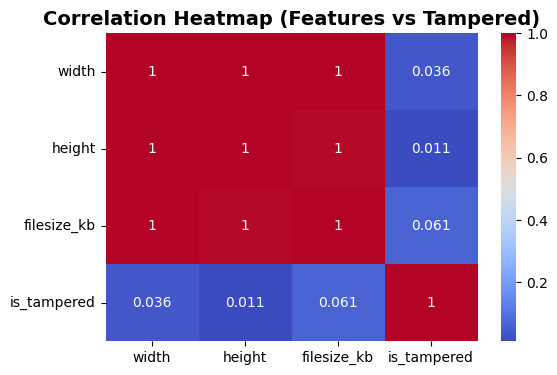

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(sample_df[['width','height','filesize_kb','is_tampered']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Features vs Tampered)", fontsize=14, weight="bold")
plt.show()


/tmp/ipython-input-2996958419.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="is_tampered", data=df, palette="Set2")
/tmp/ipython-input-2996958419.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Original", "Tampered"])


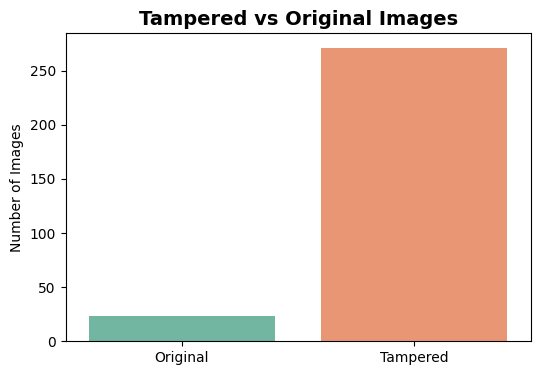

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
ax = sns.countplot(x="is_tampered", data=df, palette="Set2")
ax.set_xticklabels(["Original", "Tampered"])
plt.title("Tampered vs Original Images", fontsize=14, weight="bold")
plt.xlabel("")
plt.ylabel("Number of Images")
plt.show()


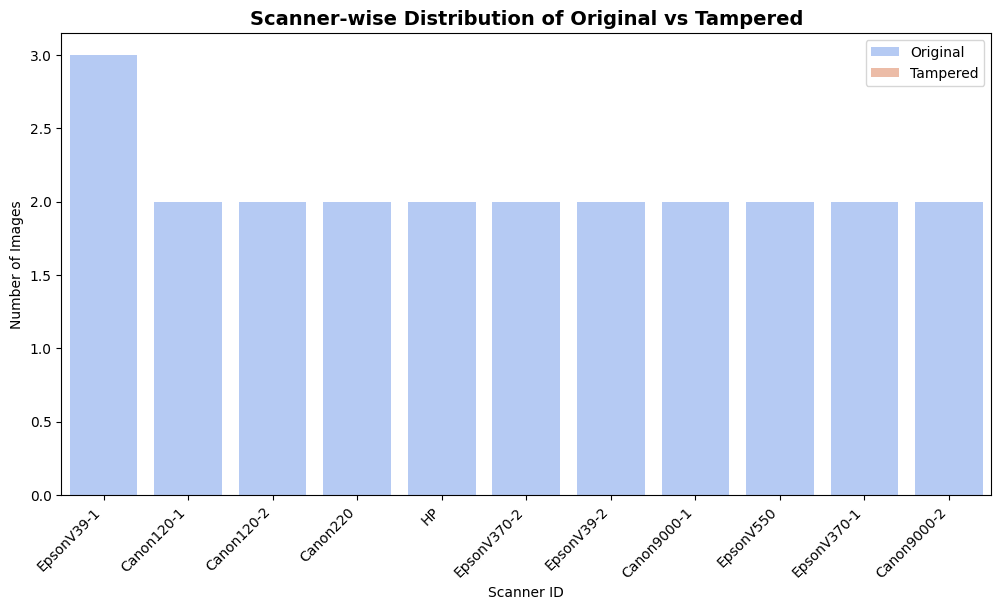

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.countplot(
    x="scanner_id",
    hue="is_tampered",
    data=df,
    order=df['scanner_id'].value_counts().index,
    palette="coolwarm"
)
plt.xticks(rotation=45, ha='right')
plt.title("Scanner-wise Distribution of Original vs Tampered", fontsize=14, weight="bold")
plt.xlabel("Scanner ID")
plt.ylabel("Number of Images")
plt.legend(["Original","Tampered"])
plt.show()


/tmp/ipython-input-112308135.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_tampered", y="filesize_kb", data=df, palette="Set3")


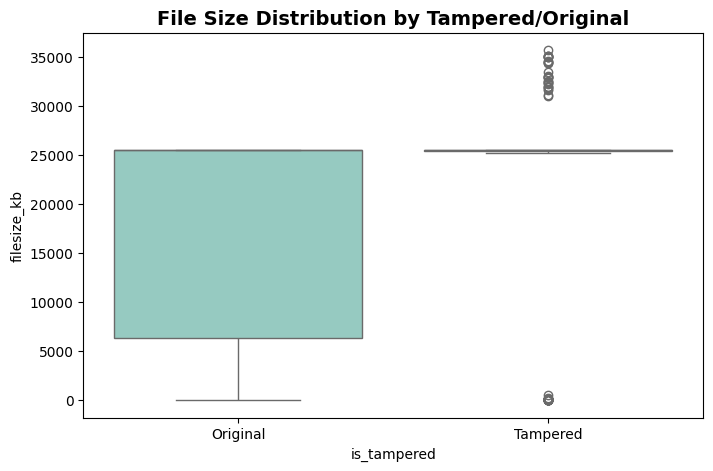

In [ ]:
from PIL import Image
import os

# Extract width, height, and file size
widths, heights, sizes = [], [], []
for path in df['filepath']:
    try:
        with Image.open(path) as img:
            widths.append(img.width)
            heights.append(img.height)
    except:
        widths.append(None)
        heights.append(None)
    sizes.append(os.path.getsize(path)/1024)  # KB

df['width'] = widths
df['height'] = heights
df['filesize_kb'] = sizes

# Boxplot of file sizes
plt.figure(figsize=(8,5))
sns.boxplot(x="is_tampered", y="filesize_kb", data=df, palette="Set3")
plt.xticks([0,1], ["Original","Tampered"])
plt.title("File Size Distribution by Tampered/Original", fontsize=14, weight="bold")
plt.show()


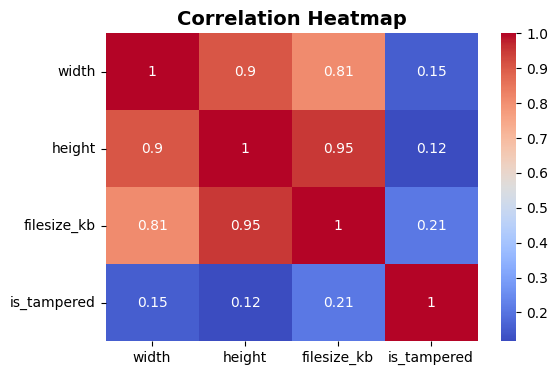

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['width','height','filesize_kb','is_tampered']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap", fontsize=14, weight="bold")
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to show fingerprint
def show_fingerprint(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Image not found:", img_path)
        return None

    img = cv2.resize(img, (256, 256))

    # Residual (denoising → subtract)
    denoised = cv2.GaussianBlur(img, (5,5), 0)
    residual = cv2.subtract(img, denoised)

    # FFT Spectrum
    fft = np.fft.fft2(residual)
    fft_shift = np.fft.fftshift(fft)
    magnitude_spectrum = np.log1p(np.abs(fft_shift))   # log(1+x) to avoid -inf
    magnitude_spectrum = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX)

    # Display 3 stages
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.imshow(img, cmap='gray')
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1,3,2)
    plt.imshow(residual, cmap='gray')
    plt.title("Residual")
    plt.axis("off")

    plt.subplot(1,3,3)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title("FFT Spectrum")
    plt.axis("off")

    plt.show()

# 🔹 Example usage: replace with any image path from Flatfield/Wikipedia
sample_path = "/content/drive/MyDrive/dataset/Flatfield/Canon120-1/sample.jpg"
show_fingerprint(sample_path)


Image not found: /content/drive/MyDrive/dataset/Flatfield/Canon120-1/sample.jpg


In [ ]:
import os

folder = "/content/drive/MyDrive/dataset/Flatfield/Canon120-1"
print("Files in:", folder)
print(os.listdir(folder)[:10])  # show first 10 files


Files in: /content/drive/MyDrive/dataset/Flatfield/Canon120-1
['300.tif', '150.tif']


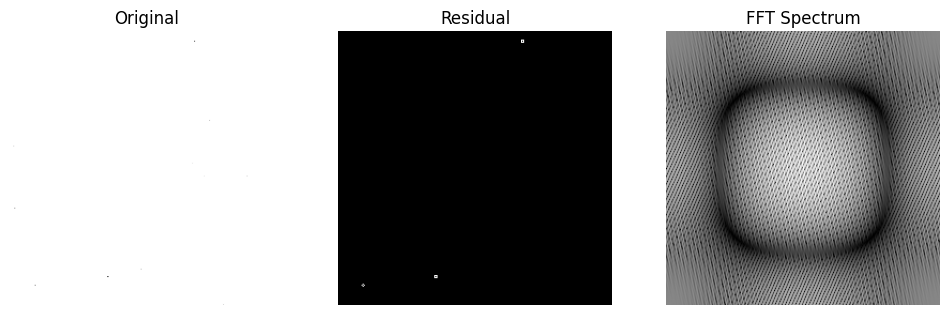

In [ ]:
sample_path = "/content/drive/MyDrive/dataset/Flatfield/Canon120-1/300.tif"
show_fingerprint(sample_path)


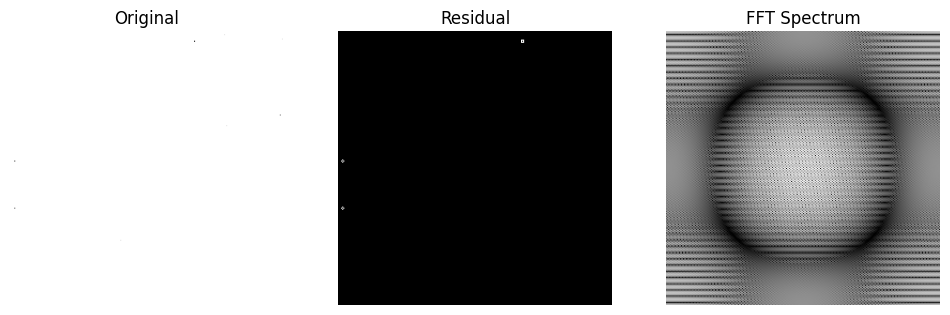

In [ ]:
sample_path = "/content/drive/MyDrive/dataset/Flatfield/Canon120-1/150.tif"
show_fingerprint(sample_path)


Saved: /content/drive/MyDrive/scanner_fingerprints/Canon120-1_Flatfield.npy


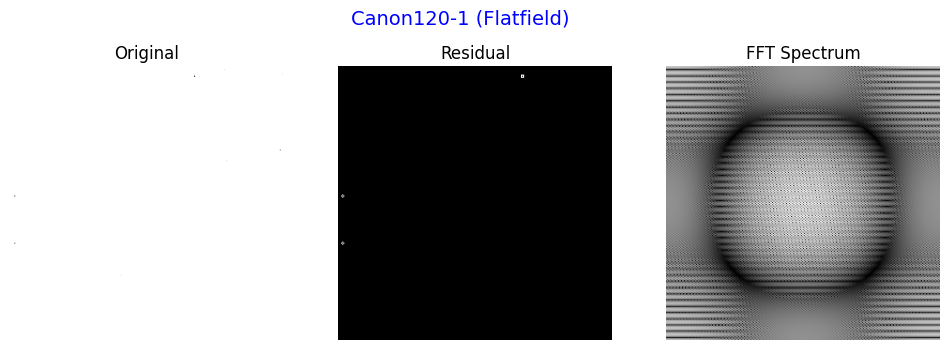

Saved: /content/drive/MyDrive/scanner_fingerprints/EpsonV39-1_Flatfield.npy


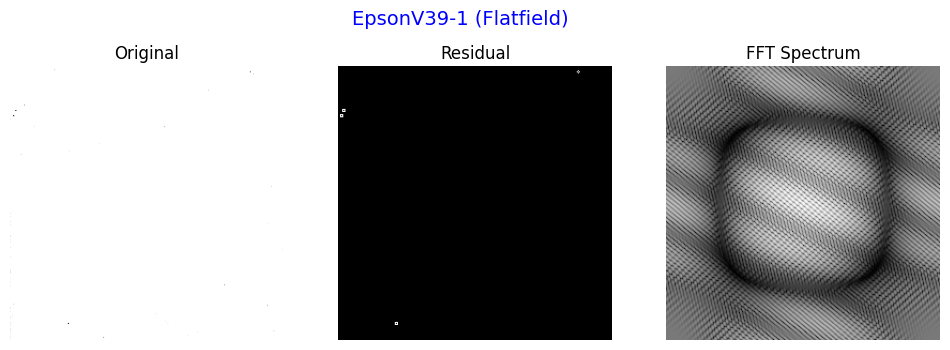

Saved: /content/drive/MyDrive/scanner_fingerprints/Canon120-2_Flatfield.npy


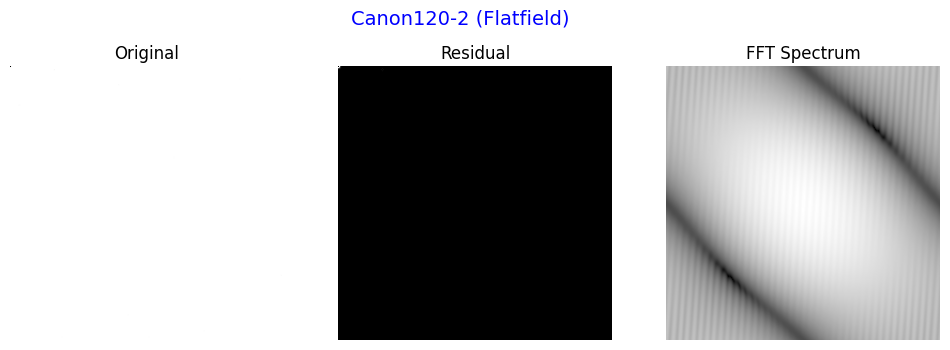

Saved: /content/drive/MyDrive/scanner_fingerprints/Canon220_Flatfield.npy


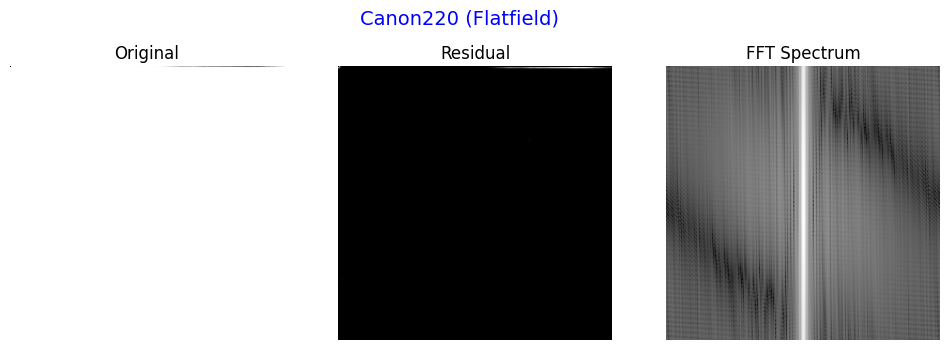

Saved: /content/drive/MyDrive/scanner_fingerprints/HP_Flatfield.npy


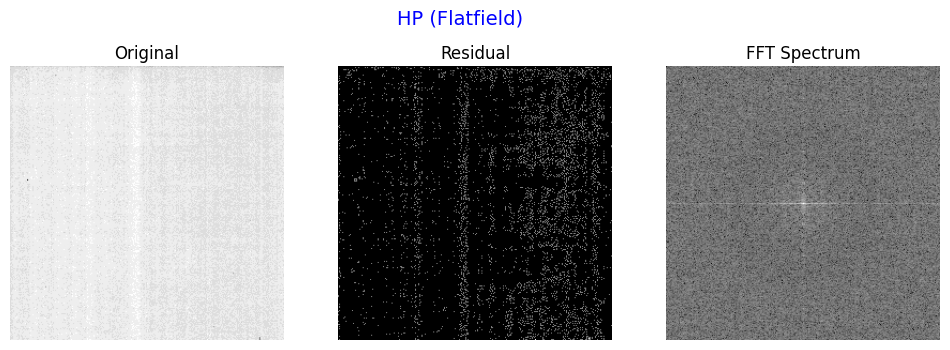

Saved: /content/drive/MyDrive/scanner_fingerprints/EpsonV370-2_Flatfield.npy


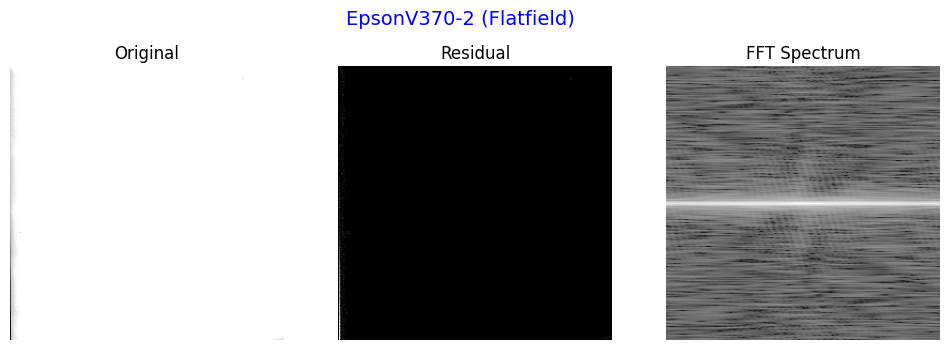

Saved: /content/drive/MyDrive/scanner_fingerprints/EpsonV39-2_Flatfield.npy


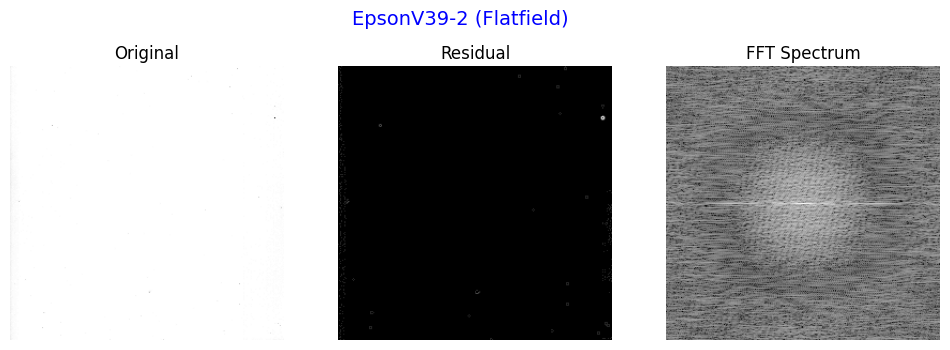

Saved: /content/drive/MyDrive/scanner_fingerprints/Canon9000-1_Flatfield.npy


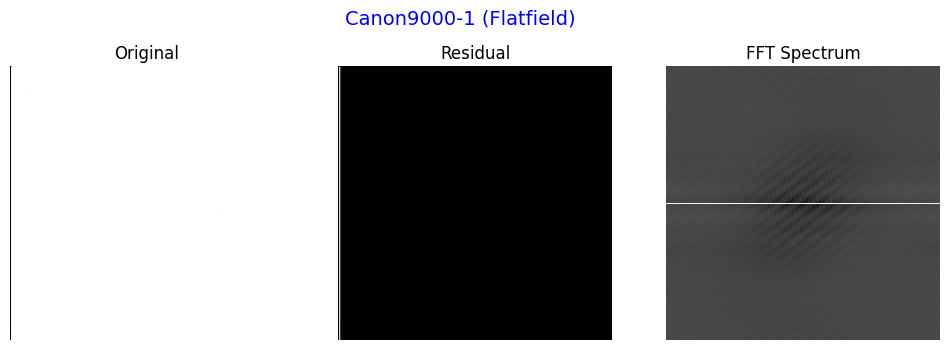

Saved: /content/drive/MyDrive/scanner_fingerprints/EpsonV550_Flatfield.npy


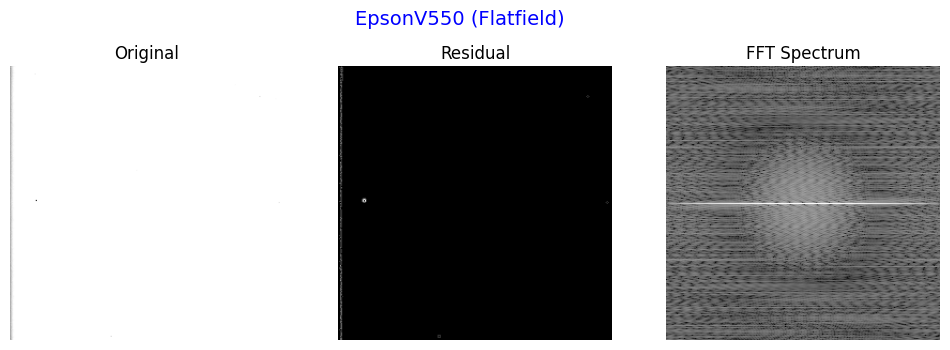

Saved: /content/drive/MyDrive/scanner_fingerprints/EpsonV370-1_Flatfield.npy


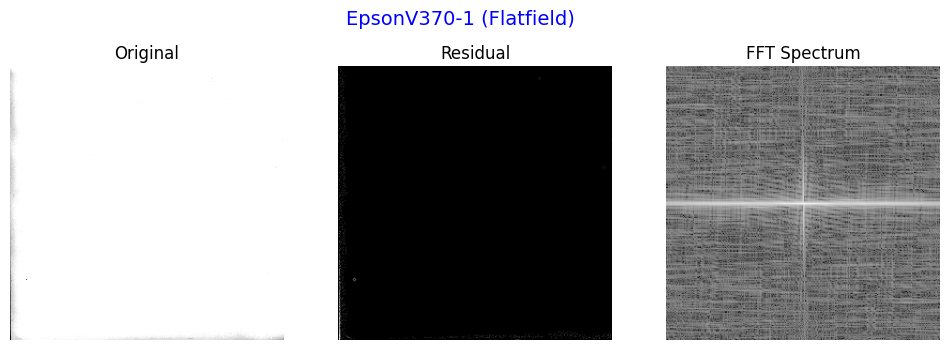

Saved: /content/drive/MyDrive/scanner_fingerprints/Canon9000-2_Flatfield.npy


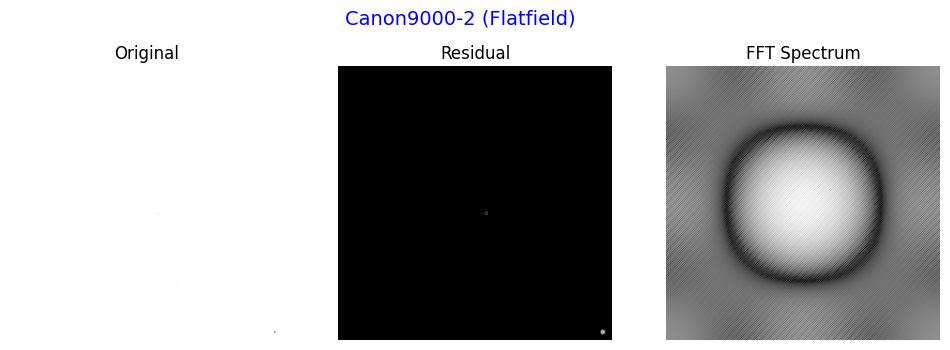

In [ ]:
import os, random
import cv2
import numpy as np
import matplotlib.pyplot as plt

SAVE_DIR = "/content/drive/MyDrive/scanner_fingerprints"
os.makedirs(SAVE_DIR, exist_ok=True)

def extract_fingerprint(img_path):
    """Extract FFT fingerprint from an image"""
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None

    img = cv2.resize(img, (256, 256))

    denoised = cv2.GaussianBlur(img, (5,5), 0)
    residual = cv2.subtract(img, denoised)

    fft = np.fft.fft2(residual)
    fft_shift = np.fft.fftshift(fft)
    magnitude_spectrum = np.log1p(np.abs(fft_shift))
    magnitude_spectrum = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX)

    return magnitude_spectrum

def process_dataset(dataset_path, source_name, save=True, visualize=True):
    for scanner in os.listdir(dataset_path):
        scanner_folder = os.path.join(dataset_path, scanner)
        if not os.path.isdir(scanner_folder):
            continue

        files = [f for f in os.listdir(scanner_folder) if f.lower().endswith(('.jpg','.jpeg','.png','.tif'))]
        if not files:
            continue

        # Pick one random image per scanner
        sample_file = random.choice(files)
        sample_path = os.path.join(scanner_folder, sample_file)

        fingerprint = extract_fingerprint(sample_path)
        if fingerprint is None:
            continue

        # Save fingerprint
        if save:
            save_path = os.path.join(SAVE_DIR, f"{scanner}_{source_name}.npy")
            np.save(save_path, fingerprint)
            print(f"Saved: {save_path}")

        # Visualize
        if visualize:
            plt.figure(figsize=(12,4))

            img = cv2.imread(sample_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (256, 256))
            denoised = cv2.GaussianBlur(img, (5,5), 0)
            residual = cv2.subtract(img, denoised)

            plt.subplot(1,3,1)
            plt.imshow(img, cmap='gray')
            plt.title("Original")
            plt.axis("off")

            plt.subplot(1,3,2)
            plt.imshow(residual, cmap='gray')
            plt.title("Residual")
            plt.axis("off")

            plt.subplot(1,3,3)
            plt.imshow(fingerprint, cmap='gray')
            plt.title("FFT Spectrum")
            plt.axis("off")

            plt.suptitle(f"{scanner} ({source_name})", fontsize=14, color="blue")
            plt.show()


# 🔹 Run for Flatfield
flatfield_path = "/content/drive/MyDrive/dataset/Flatfield"
process_dataset(flatfield_path, "Flatfield")

# 🔹 Run for Wikipedia
wikipedia_path = "/content/drive/MyDrive/dataset/Wikipedia"
process_dataset(wikipedia_path, "Wikipedia")


In [ ]:
from skimage.feature import local_binary_pattern
import cv2
import numpy as np

def extract_lbp(img_path, P=8, R=1):
    """
    Extract LBP (Local Binary Pattern) histogram from image
    P = number of circular points
    R = radius
    """
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None

    img = cv2.resize(img, (256, 256))

    # Compute LBP
    lbp = local_binary_pattern(img, P, R, method="uniform")

    # Build histogram of LBP
    (hist, _) = np.histogram(lbp.ravel(),
                             bins=np.arange(0, P + 3),
                             range=(0, P + 2))
    # Normalize
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)

    return hist, lbp


LBP histogram length: 10


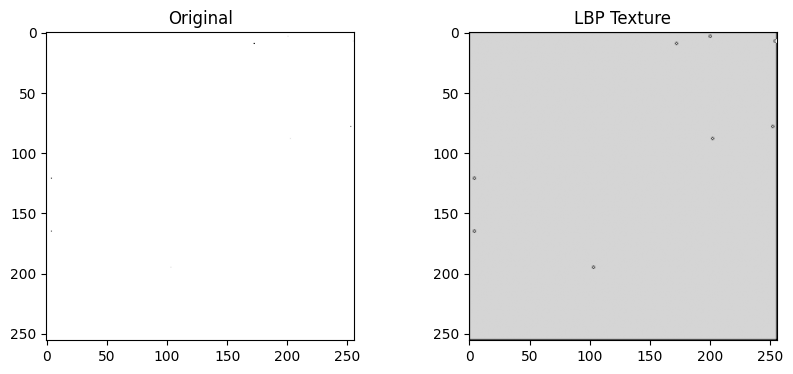

In [ ]:
sample_img = "/content/drive/MyDrive/dataset/Flatfield/Canon120-1/150.tif"

hist, lbp_img = extract_lbp(sample_img)

print("LBP histogram length:", len(hist))

# Show Original + LBP image
import matplotlib.pyplot as plt

orig = cv2.imread(sample_img, cv2.IMREAD_GRAYSCALE)
orig = cv2.resize(orig, (256, 256))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(orig, cmap="gray")
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(lbp_img, cmap="gray")
plt.title("LBP Texture")
plt.show()


In [ ]:
LBP_SAVE_DIR = "/content/drive/MyDrive/scanner_lbp"
os.makedirs(LBP_SAVE_DIR, exist_ok=True)

dataset_path = "/content/drive/MyDrive/dataset/Flatfield"

for scanner in os.listdir(dataset_path):
    scanner_folder = os.path.join(dataset_path, scanner)
    if not os.path.isdir(scanner_folder):
        continue

    files = [f for f in os.listdir(scanner_folder) if f.lower().endswith(('.jpg','.jpeg','.png','.tif'))]
    if not files:
        continue

    sample_file = random.choice(files)
    sample_path = os.path.join(scanner_folder, sample_file)

    hist, lbp_img = extract_lbp(sample_path)

    if hist is not None:
        save_path = os.path.join(LBP_SAVE_DIR, f"{scanner}_LBP.npy")
        np.save(save_path, hist)
        print(f"Saved LBP for {scanner} at {save_path}")


Saved LBP for Canon120-1 at /content/drive/MyDrive/scanner_lbp/Canon120-1_LBP.npy
Saved LBP for EpsonV39-1 at /content/drive/MyDrive/scanner_lbp/EpsonV39-1_LBP.npy
Saved LBP for Canon120-2 at /content/drive/MyDrive/scanner_lbp/Canon120-2_LBP.npy
Saved LBP for Canon220 at /content/drive/MyDrive/scanner_lbp/Canon220_LBP.npy
Saved LBP for HP at /content/drive/MyDrive/scanner_lbp/HP_LBP.npy
Saved LBP for EpsonV370-2 at /content/drive/MyDrive/scanner_lbp/EpsonV370-2_LBP.npy
Saved LBP for EpsonV39-2 at /content/drive/MyDrive/scanner_lbp/EpsonV39-2_LBP.npy
Saved LBP for Canon9000-1 at /content/drive/MyDrive/scanner_lbp/Canon9000-1_LBP.npy
Saved LBP for EpsonV550 at /content/drive/MyDrive/scanner_lbp/EpsonV550_LBP.npy
Saved LBP for EpsonV370-1 at /content/drive/MyDrive/scanner_lbp/EpsonV370-1_LBP.npy
Saved LBP for Canon9000-2 at /content/drive/MyDrive/scanner_lbp/Canon9000-2_LBP.npy


In [ ]:
import cv2
import numpy as np
import os
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt
from tqdm import tqdm

DATASET_PATH = "/content/drive/MyDrive/dataset/Flatfield"
SAVE_IMG_PATH = "/content/drive/MyDrive/scanner_lbp_images"
SAVE_FEAT_PATH = "/content/drive/MyDrive/scanner_lbp_features"

# Create folders if not exist
os.makedirs(SAVE_IMG_PATH, exist_ok=True)
os.makedirs(SAVE_FEAT_PATH, exist_ok=True)

# LBP parameters
RADIUS = 2
N_POINTS = 8 * RADIUS
METHOD = 'uniform'

def process_and_save(scanner_folder):
    folder_path = os.path.join(DATASET_PATH, scanner_folder)
    if not os.path.isdir(folder_path):
        return

    for file in os.listdir(folder_path):
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tif')):
            img_path = os.path.join(folder_path, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue

            img = cv2.resize(img, (256, 256))

            # ✅ Step 1: LBP pattern (2D)
            lbp = local_binary_pattern(img, N_POINTS, RADIUS, METHOD)

            # ✅ Step 2: Save LBP image as PNG
            plt.imshow(lbp, cmap="gray")
            plt.axis("off")
            save_img_file = f"{scanner_folder}_{os.path.splitext(file)[0]}_LBP.png"
            plt.savefig(os.path.join(SAVE_IMG_PATH, save_img_file), bbox_inches='tight', pad_inches=0)
            plt.close()

            # ✅ Step 3: Extract histogram features
            hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, N_POINTS+3), density=True)

            # ✅ Step 4: Save histogram features as .npy
            save_feat_file = f"{scanner_folder}_{os.path.splitext(file)[0]}_LBP.npy"
            np.save(os.path.join(SAVE_FEAT_PATH, save_feat_file), hist)

            print(f"Saved: {scanner_folder}/{file} → LBP image + features")

# 🔹 Loop through all scanner folders
for scanner in tqdm(os.listdir(DATASET_PATH)):
    process_and_save(scanner)

print("✅ All scanners processed! LBP images & features saved.")


  0%|          | 0/11 [00:00<?, ?it/s]

Saved: Canon120-1/300.tif → LBP image + features


  9%|▉         | 1/11 [00:00<00:05,  1.93it/s]

Saved: Canon120-1/150.tif → LBP image + features
Saved: EpsonV39-1/300.tif → LBP image + features


 18%|█▊        | 2/11 [00:01<00:04,  1.95it/s]

Saved: EpsonV39-1/150.tif → LBP image + features
Saved: Canon120-2/300.tif → LBP image + features


 27%|██▋       | 3/11 [00:01<00:04,  1.84it/s]

Saved: Canon120-2/150.tif → LBP image + features
Saved: Canon220/300.tif → LBP image + features


 36%|███▋      | 4/11 [00:03<00:07,  1.01s/it]

Saved: Canon220/150.tif → LBP image + features


 45%|████▌     | 5/11 [00:03<00:04,  1.25it/s]

Saved: HP/300.tif → LBP image + features
Saved: HP/150.tif → LBP image + features


 55%|█████▍    | 6/11 [00:04<00:03,  1.57it/s]

Saved: EpsonV370-2/300.tif → LBP image + features
Saved: EpsonV370-2/150.tif → LBP image + features


 64%|██████▎   | 7/11 [00:04<00:02,  1.83it/s]

Saved: EpsonV39-2/300.tif → LBP image + features
Saved: EpsonV39-2/150.tif → LBP image + features


 73%|███████▎  | 8/11 [00:04<00:01,  2.08it/s]

Saved: Canon9000-1/300.tif → LBP image + features
Saved: Canon9000-1/150.tif → LBP image + features


 82%|████████▏ | 9/11 [00:08<00:02,  1.38s/it]

Saved: EpsonV550/300.tif → LBP image + features
Saved: EpsonV550/150.tif → LBP image + features
Saved: EpsonV370-1/300.tif → LBP image + features


 91%|█████████ | 10/11 [00:09<00:01,  1.39s/it]

Saved: EpsonV370-1/150.tif → LBP image + features
Saved: Canon9000-2/150.tif → LBP image + features


100%|██████████| 11/11 [00:09<00:00,  1.10it/s]

Saved: Canon9000-2/300.tif → LBP image + features
✅ All scanners processed! LBP images & features saved.


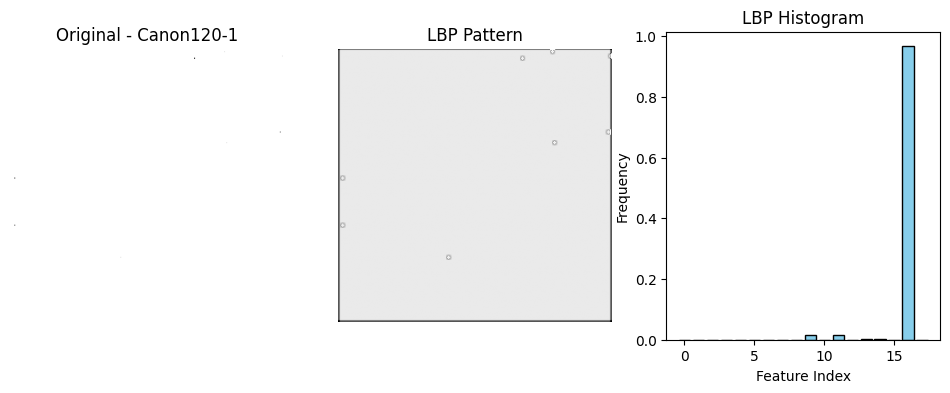

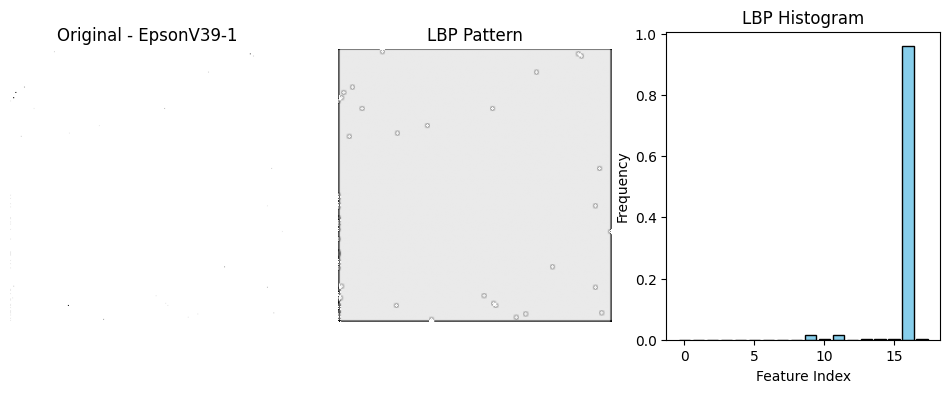

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
import os

# Parameters
RADIUS = 2
N_POINTS = 8 * RADIUS
METHOD = 'uniform'

# Function to process & visualize
def show_lbp(scanner_folder, file_name):
    img_path = f"/content/drive/MyDrive/dataset/Flatfield/{scanner_folder}/{file_name}"
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (256, 256))

    # ✅ LBP pattern
    lbp = local_binary_pattern(img, N_POINTS, RADIUS, METHOD)

    # ✅ Histogram features
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, N_POINTS+3), density=True)

    # --- Show results ---
    plt.figure(figsize=(12,4))

    # Original image
    plt.subplot(1,3,1)
    plt.imshow(img, cmap="gray")
    plt.title(f"Original - {scanner_folder}")
    plt.axis("off")

    # LBP Image
    plt.subplot(1,3,2)
    plt.imshow(lbp, cmap="gray")
    plt.title("LBP Pattern")
    plt.axis("off")

    # Histogram
    plt.subplot(1,3,3)
    plt.bar(range(len(hist)), hist, color="skyblue", edgecolor="black")
    plt.title("LBP Histogram")
    plt.xlabel("Feature Index")
    plt.ylabel("Frequency")

    plt.show()

# 🔹 Show for 2 scanners (example: Canon120-1 & EpsonV39-1)
show_lbp("Canon120-1", "150.tif")
show_lbp("EpsonV39-1", "150.tif")


In [ ]:
import cv2
import numpy as np
import os
from skimage.feature import local_binary_pattern
from tqdm import tqdm

# Wikipedia dataset path
WIKI_PATH = "/content/drive/MyDrive/dataset/Wikipedia"

# Folder to save LBP features
SAVE_PATH = "/content/drive/MyDrive/scanner_lbp_wiki"
os.makedirs(SAVE_PATH, exist_ok=True)

# Parameters for LBP
radius = 3
n_points = 8 * radius

def extract_lbp(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None
    img = cv2.resize(img, (256, 256))
    lbp = local_binary_pattern(img, n_points, radius, method="uniform")
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points+3), range=(0, n_points+2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)  # normalize
    return hist

# Loop through scanners inside Wikipedia folder
for scanner in os.listdir(WIKI_PATH):
    scanner_folder = os.path.join(WIKI_PATH, scanner)
    if not os.path.isdir(scanner_folder):
        continue

    lbp_features = []
    for file in tqdm(os.listdir(scanner_folder), desc=f"Processing {scanner}"):
        img_path = os.path.join(scanner_folder, file)
        features = extract_lbp(img_path)
        if features is not None:
            lbp_features.append(features)

    lbp_features = np.array(lbp_features)
    save_file = os.path.join(SAVE_PATH, f"{scanner}_LBP.npy")
    np.save(save_file, lbp_features)
    print(f"Saved LBP for {scanner} at {save_file}")


Processing EpsonV39-2: 100%|██████████| 2/2 [00:00<00:00, 359.12it/s]


Saved LBP for EpsonV39-2 at /content/drive/MyDrive/scanner_lbp_wiki/EpsonV39-2_LBP.npy


Processing EpsonV550: 100%|██████████| 2/2 [00:00<00:00, 350.61it/s]


Saved LBP for EpsonV550 at /content/drive/MyDrive/scanner_lbp_wiki/EpsonV550_LBP.npy


Processing EpsonV370-1: 100%|██████████| 2/2 [00:00<00:00, 547.17it/s]


Saved LBP for EpsonV370-1 at /content/drive/MyDrive/scanner_lbp_wiki/EpsonV370-1_LBP.npy


Processing EpsonV39-1: 100%|██████████| 2/2 [00:00<00:00, 366.81it/s]


Saved LBP for EpsonV39-1 at /content/drive/MyDrive/scanner_lbp_wiki/EpsonV39-1_LBP.npy


Processing Canon120-1: 100%|██████████| 2/2 [00:00<00:00, 461.37it/s]


Saved LBP for Canon120-1 at /content/drive/MyDrive/scanner_lbp_wiki/Canon120-1_LBP.npy


Processing Canon120-2: 100%|██████████| 2/2 [00:00<00:00, 350.86it/s]


Saved LBP for Canon120-2 at /content/drive/MyDrive/scanner_lbp_wiki/Canon120-2_LBP.npy


Processing Canon220: 100%|██████████| 2/2 [00:00<00:00, 404.06it/s]


Saved LBP for Canon220 at /content/drive/MyDrive/scanner_lbp_wiki/Canon220_LBP.npy


Processing Canon9000-1: 100%|██████████| 2/2 [00:00<00:00, 384.08it/s]


Saved LBP for Canon9000-1 at /content/drive/MyDrive/scanner_lbp_wiki/Canon9000-1_LBP.npy


Processing Canon9000-2: 100%|██████████| 2/2 [00:00<00:00, 515.24it/s]


Saved LBP for Canon9000-2 at /content/drive/MyDrive/scanner_lbp_wiki/Canon9000-2_LBP.npy


Processing EpsonV370-2: 100%|██████████| 2/2 [00:00<00:00, 343.68it/s]


Saved LBP for EpsonV370-2 at /content/drive/MyDrive/scanner_lbp_wiki/EpsonV370-2_LBP.npy


Processing HP: 100%|██████████| 2/2 [00:00<00:00, 366.51it/s]

Saved LBP for HP at /content/drive/MyDrive/scanner_lbp_wiki/HP_LBP.npy


PRNU Canon120-1: 100%|██████████| 2/2 [00:06<00:00,  3.11s/it]


✅ Saved PRNU for Canon120-1 at /content/drive/MyDrive/scanner_prnu/Canon120-1_PRNU.npy


PRNU EpsonV39-1: 100%|██████████| 3/3 [00:05<00:00,  1.94s/it]


✅ Saved PRNU for EpsonV39-1 at /content/drive/MyDrive/scanner_prnu/EpsonV39-1_PRNU.npy


PRNU Canon120-2: 100%|██████████| 2/2 [00:07<00:00,  3.76s/it]


✅ Saved PRNU for Canon120-2 at /content/drive/MyDrive/scanner_prnu/Canon120-2_PRNU.npy


PRNU Canon220: 100%|██████████| 2/2 [00:05<00:00,  2.59s/it]


✅ Saved PRNU for Canon220 at /content/drive/MyDrive/scanner_prnu/Canon220_PRNU.npy


PRNU HP: 100%|██████████| 2/2 [00:05<00:00,  2.83s/it]


✅ Saved PRNU for HP at /content/drive/MyDrive/scanner_prnu/HP_PRNU.npy


PRNU EpsonV370-2: 100%|██████████| 2/2 [00:05<00:00,  2.51s/it]


✅ Saved PRNU for EpsonV370-2 at /content/drive/MyDrive/scanner_prnu/EpsonV370-2_PRNU.npy


PRNU EpsonV39-2: 100%|██████████| 2/2 [00:04<00:00,  2.44s/it]


✅ Saved PRNU for EpsonV39-2 at /content/drive/MyDrive/scanner_prnu/EpsonV39-2_PRNU.npy


PRNU Canon9000-1: 100%|██████████| 2/2 [00:05<00:00,  2.84s/it]


✅ Saved PRNU for Canon9000-1 at /content/drive/MyDrive/scanner_prnu/Canon9000-1_PRNU.npy


PRNU EpsonV550: 100%|██████████| 2/2 [00:04<00:00,  2.20s/it]


✅ Saved PRNU for EpsonV550 at /content/drive/MyDrive/scanner_prnu/EpsonV550_PRNU.npy


PRNU EpsonV370-1: 100%|██████████| 2/2 [00:05<00:00,  2.70s/it]


✅ Saved PRNU for EpsonV370-1 at /content/drive/MyDrive/scanner_prnu/EpsonV370-1_PRNU.npy


PRNU Canon9000-2: 100%|██████████| 2/2 [00:05<00:00,  2.61s/it]


✅ Saved PRNU for Canon9000-2 at /content/drive/MyDrive/scanner_prnu/Canon9000-2_PRNU.npy


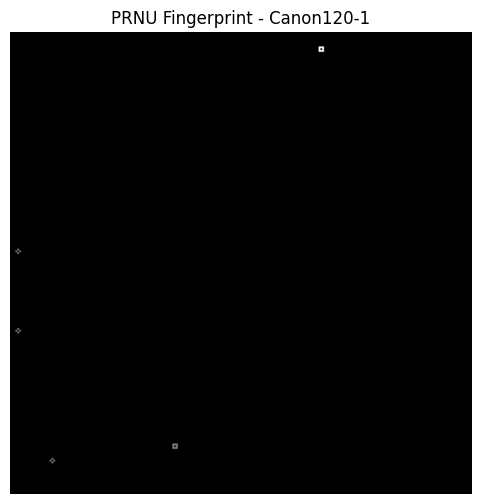

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

# 📌 Flatfield folder path
FLATFIELD_PATH = "/content/drive/MyDrive/dataset/Flatfield"

# Function: Residual (noise extraction)
def extract_residual(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None
    img = cv2.resize(img, (256, 256))
    denoised = cv2.GaussianBlur(img, (5,5), 0)
    residual = cv2.subtract(img, denoised)
    return residual.astype(np.float32)

# Function: PRNU fingerprint (average residual)
def compute_prnu(scanner_folder, max_images=10):
    residuals = []
    files = os.listdir(scanner_folder)
    files = [f for f in files if f.endswith((".jpg",".png",".tif",".jpeg"))]

    for f in tqdm(files[:max_images], desc=f"PRNU {os.path.basename(scanner_folder)}"):
        res = extract_residual(os.path.join(scanner_folder, f))
        if res is not None:
            residuals.append(res)

    if len(residuals) == 0:
        return None

    # Average residuals
    prnu = np.mean(residuals, axis=0)
    return prnu

# 📌 Loop through all scanner folders in Flatfield
PRNU_SAVE = "/content/drive/MyDrive/scanner_prnu"
os.makedirs(PRNU_SAVE, exist_ok=True)

scanner_prnus = {}

for scanner in os.listdir(FLATFIELD_PATH):
    scanner_folder = os.path.join(FLATFIELD_PATH, scanner)
    if os.path.isdir(scanner_folder):
        prnu = compute_prnu(scanner_folder, max_images=10)
        if prnu is not None:
            scanner_prnus[scanner] = prnu
            np.save(os.path.join(PRNU_SAVE, f"{scanner}_PRNU.npy"), prnu)
            print(f"✅ Saved PRNU for {scanner} at {PRNU_SAVE}/{scanner}_PRNU.npy")

# 📌 Visualize an example PRNU
example_scanner = list(scanner_prnus.keys())[0]
plt.figure(figsize=(6,6))
plt.imshow(scanner_prnus[example_scanner], cmap="gray")
plt.title(f"PRNU Fingerprint - {example_scanner}")
plt.axis("off")
plt.show()


In [ ]:
import cv2
import numpy as np
import os
from tqdm import tqdm

# -------------------------
# 1. Load PRNU fingerprints (Flatfield reference)
# -------------------------
PRNU_PATH = "/content/drive/MyDrive/scanner_prnu"   # yahan tumne Flatfield PRNU save kiya
prnu_fingerprints = {}

for file in os.listdir(PRNU_PATH):
    if file.endswith(".npy"):
        scanner_id = file.replace("_PRNU.npy", "")
        prnu_fingerprints[scanner_id] = np.load(os.path.join(PRNU_PATH, file))

print("Loaded PRNU fingerprints:", list(prnu_fingerprints.keys()))


# -------------------------
# 2. Residual extraction function (for test images)
# -------------------------
def get_residual(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None
    img = cv2.resize(img, (256,256))
    denoised = cv2.GaussianBlur(img, (5,5), 0)
    residual = cv2.subtract(img, denoised)
    return residual.astype(np.float32)


# -------------------------
# 3. NCC similarity function
# -------------------------
def ncc(a, b):
    a = (a - np.mean(a)) / (np.std(a) + 1e-8)
    b = (b - np.mean(b)) / (np.std(b) + 1e-8)
    return np.mean(a * b)


# -------------------------
# 4. Predict scanner for a test image
# -------------------------
def predict_scanner(test_img_path):
    residual = get_residual(test_img_path)
    if residual is None:
        return None

    scores = {}
    for scanner, prnu in prnu_fingerprints.items():
        score = ncc(residual, prnu)
        scores[scanner] = score

    # Sort scanners by similarity
    best_match = max(scores, key=scores.get)
    return best_match, scores


# -------------------------
# 5. Example: Test on a Wikipedia document
# -------------------------
 # ek image ka path daalo
test_img = "/content/drive/MyDrive/dataset/Wikipedia/Canon120-1/150/s1_1.tif"

predicted, all_scores = predict_scanner(test_img)
print("Predicted Scanner:", predicted)
print("All NCC scores:", all_scores)



Loaded PRNU fingerprints: ['Canon120-1', 'EpsonV39-1', 'Canon120-2', 'Canon220', 'HP', 'EpsonV370-2', 'EpsonV39-2', 'Canon9000-1', 'EpsonV550', 'EpsonV370-1', 'Canon9000-2']
Predicted Scanner: Canon120-2
All NCC scores: {'Canon120-1': np.float32(-0.009535039), 'EpsonV39-1': np.float32(-0.014282977), 'Canon120-2': np.float32(-0.004764894), 'Canon220': np.float32(-0.028640792), 'HP': np.float32(-0.012447171), 'EpsonV370-2': np.float32(-0.03961418), 'EpsonV39-2': np.float32(-0.050684437), 'Canon9000-1': np.float32(-0.041828725), 'EpsonV550': np.float32(-0.042529583), 'EpsonV370-1': np.float32(-0.047577057), 'Canon9000-2': np.float32(-0.008874631)}


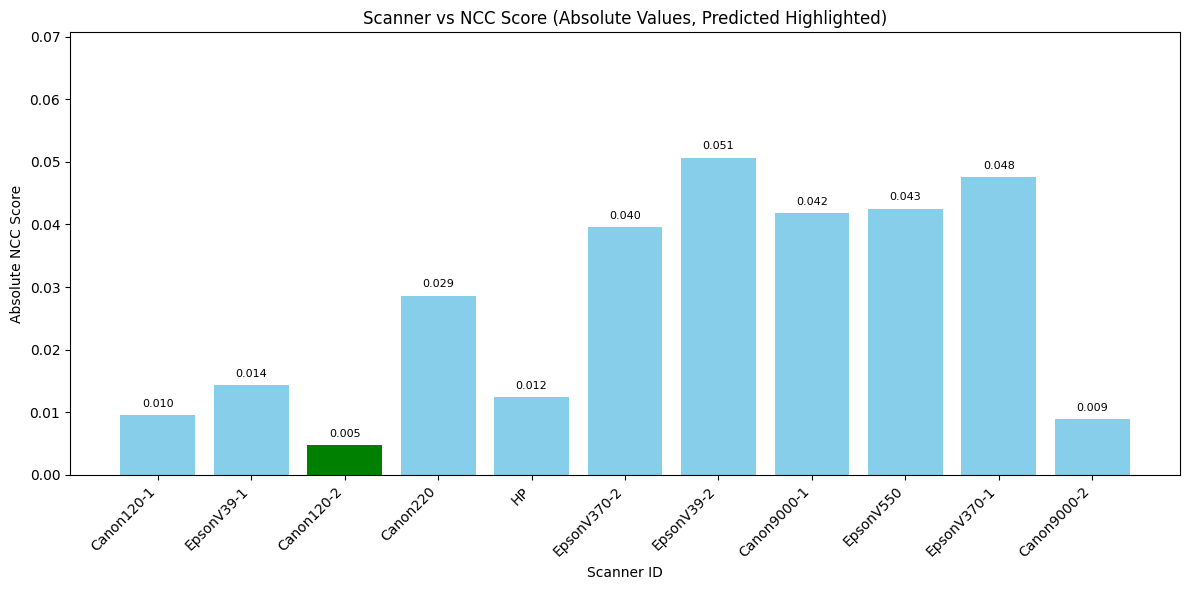

In [ ]:
# Absolute NCC scores
scores_abs = {k: abs(float(v)) for k, v in all_scores.items()}

predicted_scanner = "Canon120-2"  # jo predicted hai

plt.figure(figsize=(12,6))

# Color mapping: green for predicted, skyblue for others
colors = ["green" if scanner == predicted_scanner else "skyblue" for scanner in scores_abs.keys()]

plt.bar(scores_abs.keys(), scores_abs.values(), color=colors)

# Bar labels (score values upar show karenge)
for i, (scanner, score) in enumerate(scores_abs.items()):
    plt.text(i, score + 0.001, f"{score:.3f}", ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Absolute NCC Score")
plt.xlabel("Scanner ID")
plt.title("Scanner vs NCC Score (Absolute Values, Predicted Highlighted)")
plt.ylim(0, max(scores_abs.values()) + 0.02)  # start from 0
plt.tight_layout()
plt.show()


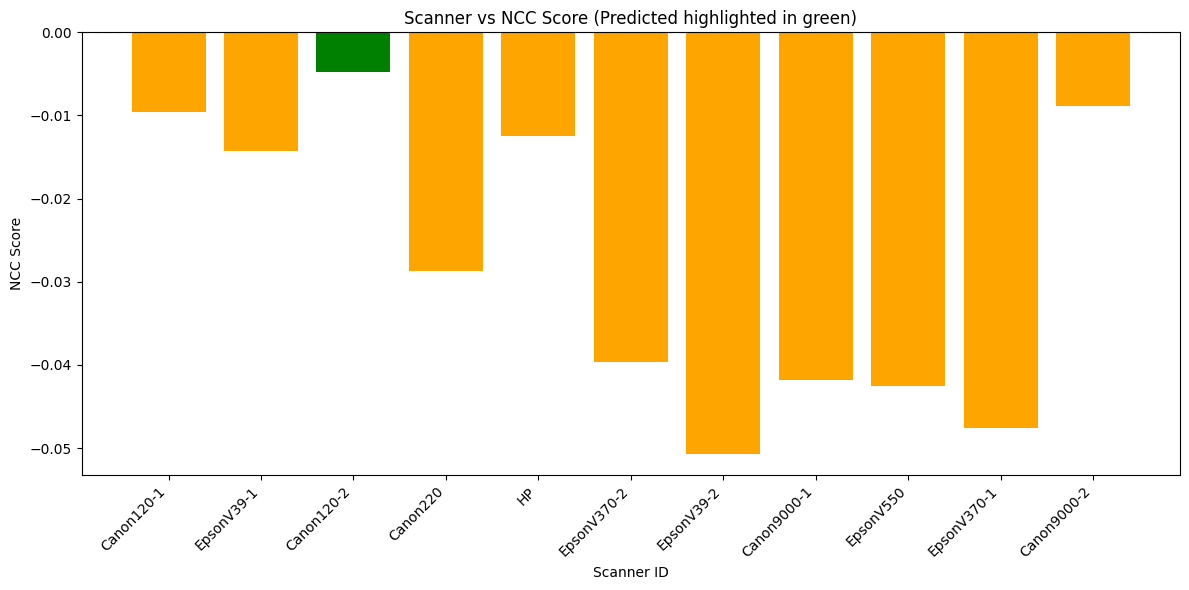

Predicted Scanner: Canon120-2


In [ ]:
import matplotlib.pyplot as plt

# raw scores use karte hain (abs nahi)
scores_raw = {k: float(v) for k, v in all_scores.items()}

# predicted scanner ko identify karo
predicted_scanner = max(scores_raw, key=scores_raw.get)

colors = ["green" if k == predicted_scanner else "orange" for k in scores_raw.keys()]

plt.figure(figsize=(12,6))
plt.bar(scores_raw.keys(), scores_raw.values(), color=colors)
plt.xticks(rotation=45, ha="right")
plt.ylabel("NCC Score")
plt.xlabel("Scanner ID")
plt.title("Scanner vs NCC Score (Predicted highlighted in green)")
plt.axhline(0, color="red", linestyle="--")  # baseline
plt.tight_layout()
plt.show()

print("Predicted Scanner:", predicted_scanner)


In [ ]:
import os

dataset_path = "/content/drive/MyDrive/dataset"

for folder in ["Official", "Wikipedia"]:
    folder_path = os.path.join(dataset_path, folder)
    print(f"\nChecking: {folder_path}")
    if not os.path.exists(folder_path):
        print("❌ Folder not found")
        continue
    for scanner in os.listdir(folder_path):
        scanner_path = os.path.join(folder_path, scanner)
        print("  Scanner folder:", scanner)
        print("   -> First 5 files:", os.listdir(scanner_path)[:5])



Checking: /content/drive/MyDrive/dataset/Official
  Scanner folder: Canon120-1
   -> First 5 files: ['150', '300']
  Scanner folder: Canon220
   -> First 5 files: ['300', '150']
  Scanner folder: EpsonV370-2
   -> First 5 files: ['300', '150']
  Scanner folder: EpsonV370-1
   -> First 5 files: ['150', '300']
  Scanner folder: Canon9000-2
   -> First 5 files: ['150', '300']
  Scanner folder: Canon120-2
   -> First 5 files: ['150', '300']
  Scanner folder: HP
   -> First 5 files: ['300', '150']
  Scanner folder: EpsonV39-2
   -> First 5 files: ['150', '300']
  Scanner folder: EpsonV550
   -> First 5 files: ['150', '300']
  Scanner folder: Canon9000-1
   -> First 5 files: ['150', '300']
  Scanner folder: EpsonV39-1
   -> First 5 files: ['150', '300']

Checking: /content/drive/MyDrive/dataset/Wikipedia
  Scanner folder: EpsonV39-2
   -> First 5 files: ['300', '150']
  Scanner folder: EpsonV550
   -> First 5 files: ['300', '150']
  Scanner folder: EpsonV370-1
   -> First 5 files: ['300', '

In [ ]:
import os
import pandas as pd

official_path = "/content/drive/MyDrive/dataset/Official"
wiki_path = "/content/drive/MyDrive/dataset/Wikipedia"

data = []

# Loop through both dataset folders
for base_path in [official_path, wiki_path]:
    for scanner in os.listdir(base_path):
        scanner_folder = os.path.join(base_path, scanner)
        if not os.path.isdir(scanner_folder):
            continue
        # now go inside dpi folders (150, 300)
        for dpi_folder in os.listdir(scanner_folder):
            dpi_path = os.path.join(scanner_folder, dpi_folder)
            if not os.path.isdir(dpi_path):
                continue
            for file in os.listdir(dpi_path):
                if file.endswith(".tif"):   # only tif images
                    filepath = os.path.join(dpi_path, file)
                    data.append({"filepath": filepath, "scanner": scanner})

df_scanner = pd.DataFrame(data)

print("✅ Total images:", len(df_scanner))
print("✅ Unique scanners:", df_scanner['scanner'].unique())
print(df_scanner.head())


✅ Total images: 4568
✅ Unique scanners: ['Canon120-1' 'Canon220' 'EpsonV370-2' 'EpsonV370-1' 'Canon9000-2'
 'Canon120-2' 'HP' 'EpsonV39-2' 'EpsonV550' 'Canon9000-1' 'EpsonV39-1']
                                            filepath     scanner
0  /content/drive/MyDrive/dataset/Official/Canon1...  Canon120-1
1  /content/drive/MyDrive/dataset/Official/Canon1...  Canon120-1
2  /content/drive/MyDrive/dataset/Official/Canon1...  Canon120-1
3  /content/drive/MyDrive/dataset/Official/Canon1...  Canon120-1
4  /content/drive/MyDrive/dataset/Official/Canon1...  Canon120-1


100%|██████████| 4568/4568 [2:27:53<00:00,  1.94s/it]


✅ Feature shape: (4567, 16384)
✅ Labels shape: (4567,)
✅ Accuracy: 0.7910284463894968

Classification Report:
               precision    recall  f1-score   support

  Canon120-1       0.72      0.60      0.66        83
  Canon120-2       0.64      0.71      0.67        83
    Canon220       0.74      0.77      0.75        83
 Canon9000-1       0.77      0.71      0.74        83
 Canon9000-2       0.74      0.74      0.74        82
 EpsonV370-1       0.90      0.92      0.91        83
 EpsonV370-2       0.89      0.83      0.86        84
  EpsonV39-1       0.77      0.76      0.76        83
  EpsonV39-2       0.70      0.86      0.77        83
   EpsonV550       0.87      0.80      0.83        84
          HP       0.99      1.00      0.99        83

    accuracy                           0.79       914
   macro avg       0.79      0.79      0.79       914
weighted avg       0.79      0.79      0.79       914



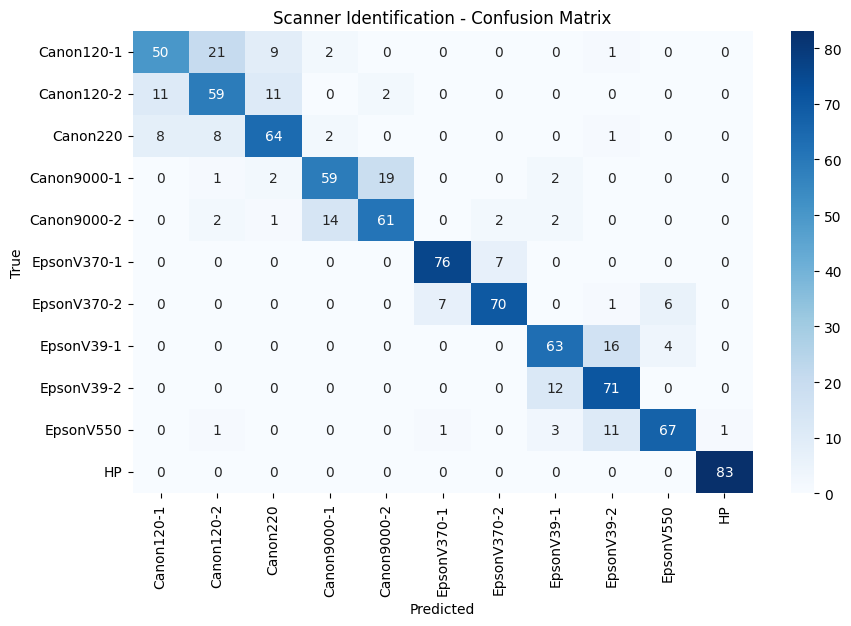

In [ ]:
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ===========================
# Step 1: Feature Extraction
# ===========================
X, y = [], []

for i, row in tqdm(df_scanner.iterrows(), total=len(df_scanner)):
    img = cv2.imread(row['filepath'], cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue

    img = cv2.resize(img, (128, 128))   # fixed size
    feature = img.flatten()             # flatten pixels
    X.append(feature)
    y.append(row['scanner'])

X = np.array(X)
y = np.array(y)

print("✅ Feature shape:", X.shape)
print("✅ Labels shape:", y.shape)

# ===========================
# Step 2: Train/Test Split
# ===========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===========================
# Step 3: Train SVM
# ===========================
clf = SVC(kernel="linear", C=1)
clf.fit(X_train, y_train)

# ===========================
# Step 4: Evaluate
# ===========================
y_pred = clf.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d",
            xticklabels=clf.classes_, yticklabels=clf.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Scanner Identification - Confusion Matrix")
plt.show()


100%|██████████| 4568/4568 [3:16:08<00:00,  2.58s/it]


✅ Feature shape: (4568, 16384)
✅ Labels shape: (4568,)

🌲 Random Forest Results
✅ Accuracy: 0.899343544857768

Classification Report:
               precision    recall  f1-score   support

  Canon120-1       0.88      0.89      0.89        83
  Canon120-2       0.88      0.88      0.88        83
    Canon220       0.89      0.93      0.91        83
 Canon9000-1       0.71      0.67      0.69        83
 Canon9000-2       0.70      0.66      0.68        82
 EpsonV370-1       0.99      1.00      0.99        83
 EpsonV370-2       1.00      0.99      0.99        84
  EpsonV39-1       0.94      0.88      0.91        83
  EpsonV39-2       0.89      0.99      0.94        84
   EpsonV550       1.00      1.00      1.00        83
          HP       1.00      1.00      1.00        83

    accuracy                           0.90       914
   macro avg       0.90      0.90      0.90       914
weighted avg       0.90      0.90      0.90       914



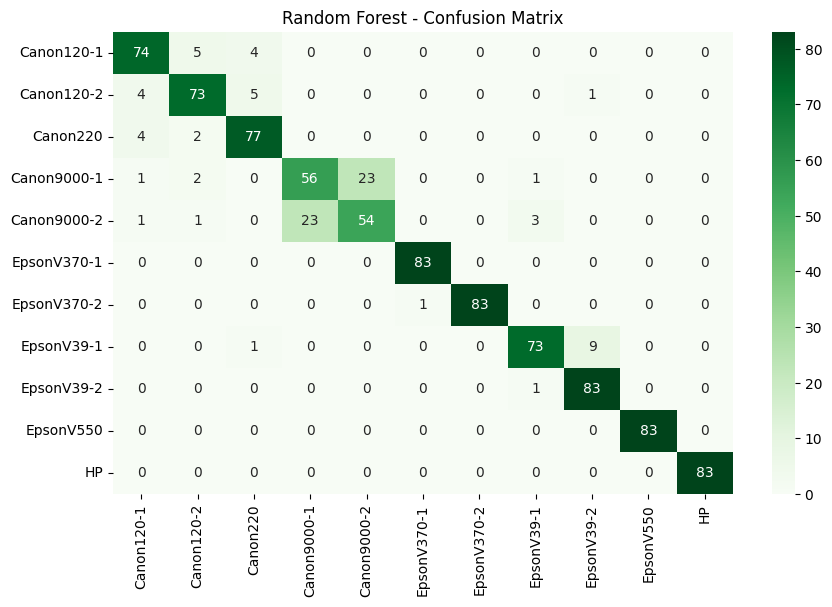

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10], got ['Canon120-1' 'Canon120-2' 'Canon220' 'Canon9000-1' 'Canon9000-2'
 'EpsonV370-1' 'EpsonV370-2' 'EpsonV39-1' 'EpsonV39-2' 'EpsonV550' 'HP']

In [ ]:
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

# ===========================
# Step 1: Feature Extraction
# ===========================
X, y = [], []

for i, row in tqdm(df_scanner.iterrows(), total=len(df_scanner)):
    img = cv2.imread(row['filepath'], cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue

    img = cv2.resize(img, (128, 128))   # fixed size
    feature = img.flatten()             # flatten pixels
    X.append(feature)
    y.append(row['scanner'])

X = np.array(X)
y = np.array(y)

print("✅ Feature shape:", X.shape)
print("✅ Labels shape:", y.shape)

# ===========================
# Step 2: Train/Test Split
# ===========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===========================
# Step 3: Random Forest
# ===========================
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("\n🌲 Random Forest Results")
print("✅ Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d",
            xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_, cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.show()

# ===========================
# Step 4: XGBoost
# ===========================
xgb_clf = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    tree_method="hist"   # fast training
)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

print("\n🚀 XGBoost Results")
print("✅ Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d",
            xticklabels=xgb_clf.classes_, yticklabels=xgb_clf.classes_, cmap="Oranges")
plt.title("XGBoost - Confusion Matrix")
plt.show()


In [ ]:
import pickle

# Save trained Random Forest model
with open("/content/drive/MyDrive/scanner_random_forest.pkl", "wb") as f:
    pickle.dump(rf_clf, f)

print("✅ Random Forest model saved successfully at /content/drive/MyDrive/scanner_random_forest.pkl")


✅ Random Forest model saved successfully at /content/drive/MyDrive/scanner_random_forest.pkl


100%|██████████| 4568/4568 [2:45:16<00:00,  2.17s/it]


✅ Feature shape: (4568, 16384)
✅ Labels shape: (4568,)
💾 Features and labels saved!
💾 Label encoder saved!
💾 XGBoost model saved!

🚀 XGBoost Results
✅ Accuracy: 0.9770240700218819

Classification Report:
               precision    recall  f1-score   support

  Canon120-1       1.00      1.00      1.00        83
  Canon120-2       1.00      0.94      0.97        83
    Canon220       0.96      0.99      0.98        83
 Canon9000-1       0.96      0.92      0.94        83
 Canon9000-2       0.89      0.98      0.93        82
 EpsonV370-1       0.97      1.00      0.98        83
 EpsonV370-2       1.00      0.96      0.98        84
  EpsonV39-1       0.98      0.99      0.98        83
  EpsonV39-2       1.00      0.98      0.99        84
   EpsonV550       1.00      1.00      1.00        83
          HP       1.00      1.00      1.00        83

    accuracy                           0.98       914
   macro avg       0.98      0.98      0.98       914
weighted avg       0.98      0.98    

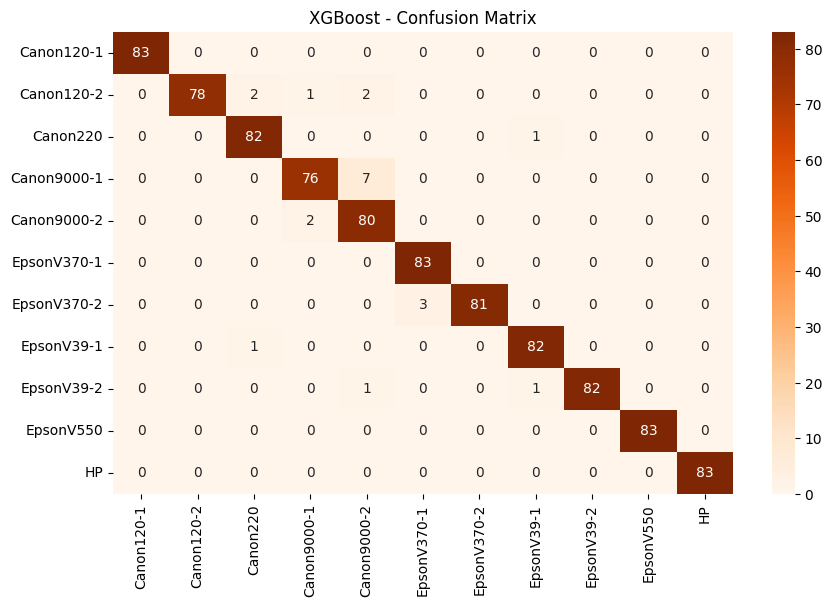

In [ ]:
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import joblib   # for saving label encoder + model

# ===========================
# Step 1: Feature Extraction
# ===========================
X, y = [], []

for i, row in tqdm(df_scanner.iterrows(), total=len(df_scanner)):
    img = cv2.imread(row['filepath'], cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue

    img = cv2.resize(img, (128, 128))   # fixed size
    feature = img.flatten()             # flatten pixels
    X.append(feature)
    y.append(row['scanner'])

X = np.array(X)
y = np.array(y)

print("✅ Feature shape:", X.shape)
print("✅ Labels shape:", y.shape)

# ✅ Save features & labels
np.save("/content/drive/MyDrive/scanner_X.npy", X)
np.save("/content/drive/MyDrive/scanner_y.npy", y)
print("💾 Features and labels saved!")

# ===========================
# Step 2: Train/Test Split
# ===========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Encode labels (XGBoost requires numbers)
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# 💾 Save LabelEncoder
joblib.dump(le, "/content/drive/MyDrive/label_encoder.pkl")
print("💾 Label encoder saved!")

# ===========================
# Step 3: Train XGBoost
# ===========================
xgb_clf = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    tree_method="hist",
    n_jobs=-1
)

xgb_clf.fit(X_train, y_train_enc)
y_pred_xgb = xgb_clf.predict(X_test)

# 💾 Save trained model
joblib.dump(xgb_clf, "/content/drive/MyDrive/xgb_model.pkl")
print("💾 XGBoost model saved!")

# ===========================
# Step 4: Evaluate
# ===========================
print("\n🚀 XGBoost Results")
print("✅ Accuracy:", accuracy_score(y_test_enc, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred_xgb, target_names=le.classes_))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test_enc, y_pred_xgb), annot=True, fmt="d",
            xticklabels=le.classes_, yticklabels=le.classes_, cmap="Oranges")
plt.title("XGBoost - Confusion Matrix")
plt.show()


In [ ]:
import cv2
import numpy as np
import joblib

# ===========================
# Load model + label encoder
# ===========================
xgb_model = joblib.load("/content/drive/MyDrive/xgb_model.pkl")
le = joblib.load("/content/drive/MyDrive/label_encoder.pkl")

# ===========================
# Prediction function
# ===========================
def predict_scanner(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return "❌ Image not found!"

    # Preprocess (same as training)
    img = cv2.resize(img, (128, 128))
    feature = img.flatten().reshape(1, -1)

    # Predict
    pred_enc = xgb_model.predict(feature)[0]
    pred_label = le.inverse_transform([pred_enc])[0]

    return f"🔍 Predicted Scanner: {pred_label}"

# ===========================
# Example test
# ===========================
print(predict_scanner("/content/drive/MyDrive/dataset/Wikipedia/Canon120-1/150/s1_1.tif"))
print(predict_scanner("/content/drive/MyDrive/dataset/Wikipedia/EpsonV39-1/300/s8_1.tif"))


🔍 Predicted Scanner: Canon120-1
🔍 Predicted Scanner: EpsonV39-1


In [ ]:
import cv2, numpy as np
from tqdm import tqdm

# ==== Example simple FFT + LBP + Residual ====
def extract_fft(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
    return magnitude_spectrum.flatten()[:500]

def extract_lbp(img):
    lbp = np.zeros_like(img)
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            center = img[i, j]
            binary = [(img[i-1,j-1]>center), (img[i-1,j]>center), (img[i-1,j+1]>center),
                      (img[i,j+1]>center), (img[i+1,j+1]>center), (img[i+1,j]>center),
                      (img[i+1,j-1]>center), (img[i,j-1]>center)]
            lbp[i,j] = int("".join(['1' if b else '0' for b in binary]),2)
    hist,_ = np.histogram(lbp.ravel(), bins=256, range=(0,256))
    return hist

def extract_prnu(img):
    blur = cv2.GaussianBlur(img, (3,3), 0)
    residual = img - blur
    return residual.flatten()[:500]

X, y = [], []
for i, row in tqdm(df_scanner.iterrows(), total=len(df_scanner)):
    img = cv2.imread(row['filepath'], cv2.IMREAD_GRAYSCALE)
    if img is None: continue
    img = cv2.resize(img,(128,128))
    feature = np.concatenate([extract_fft(img), extract_lbp(img), extract_prnu(img)])
    X.append(feature); y.append(row['scanner'])

X, y = np.array(X), np.array(y)
np.save("scanner_hybrid_X.npy", X)
np.save("scanner_hybrid_y.npy", y)

print("✅ Features saved:", X.shape, y.shape)


100%|██████████| 4568/4568 [2:17:46<00:00,  1.81s/it]


✅ Features saved: (4568, 1256) (4568,)


In [ ]:
import numpy as np, joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load features
X = np.load("scanner_hybrid_X.npy")
y = np.load("scanner_hybrid_y.npy")

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train); y_test_enc = le.transform(y_test)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train_enc)
joblib.dump(rf, "rf_hybrid.pkl")
joblib.dump(le, "label_encoder.pkl")

y_pred = rf.predict(X_test)
print("🌲 RF Accuracy:", accuracy_score(y_test_enc, y_pred))
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))


🌲 RF Accuracy: 0.712253829321663
              precision    recall  f1-score   support

  Canon120-1       1.00      0.98      0.99        83
  Canon120-2       0.60      0.34      0.43        83
    Canon220       0.61      0.60      0.61        83
 Canon9000-1       0.37      0.54      0.44        83
 Canon9000-2       0.45      0.44      0.44        82
 EpsonV370-1       0.68      0.72      0.70        83
 EpsonV370-2       0.68      0.74      0.71        84
  EpsonV39-1       0.66      0.64      0.65        83
  EpsonV39-2       0.92      0.92      0.92        84
   EpsonV550       1.00      0.92      0.96        83
          HP       1.00      1.00      1.00        83

    accuracy                           0.71       914
   macro avg       0.72      0.71      0.71       914
weighted avg       0.72      0.71      0.71       914



In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel="linear", probability=True)
svm.fit(X_train, y_train_enc)
joblib.dump(svm, "svm_hybrid.pkl")

y_pred = svm.predict(X_test)
print("⚡ SVM Accuracy:", accuracy_score(y_test_enc, y_pred))


⚡ SVM Accuracy: 0.7242888402625821


In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, tree_method="hist")
xgb_clf.fit(X_train, y_train_enc)
joblib.dump(xgb_clf, "xgb_hybrid.pkl")

y_pred = xgb_clf.predict(X_test)
print("🚀 XGBoost Accuracy:", accuracy_score(y_test_enc, y_pred))


🚀 XGBoost Accuracy: 0.7450765864332604


100%|██████████| 4568/4568 [2:19:58<00:00,  1.84s/it]


✅ Image data: (4568, 128, 128, 3) (4568,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,059 (12.61 MB)

 Trainable params: 3,306,059 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.0989 - loss: 2.4441 - val_accuracy: 0.0908 - val_loss: 2.3979
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.0946 - loss: 2.3982 - val_accuracy: 0.0919 - val_loss: 2.3979
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.0958 - loss: 2.3992 - val_accuracy: 0.0908 - val_loss: 2.3980
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.0999 - loss: 2.3988 - val_accuracy: 0.0908 - val_loss: 2.3982
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.0953 - loss: 2.3983 - val_accuracy: 0.0919 - val_loss: 2.3980
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.0896 - loss: 2.3986 - val_accuracy: 0.0897 - val_loss: 2.3980
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.0907 - loss: 2.3987 - val_accuracy: 0.0919 - val_loss: 2.3979
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.0862 - loss: 2.3984 - val_accu

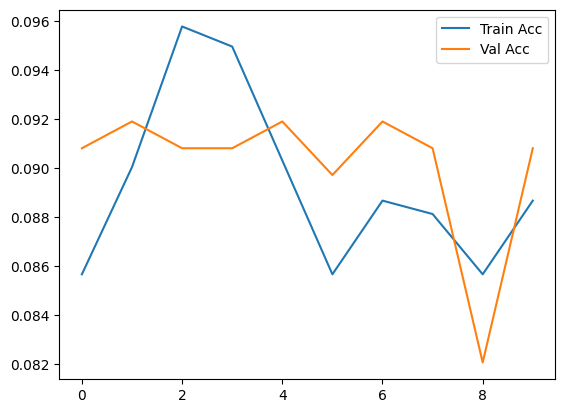

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 290ms/step


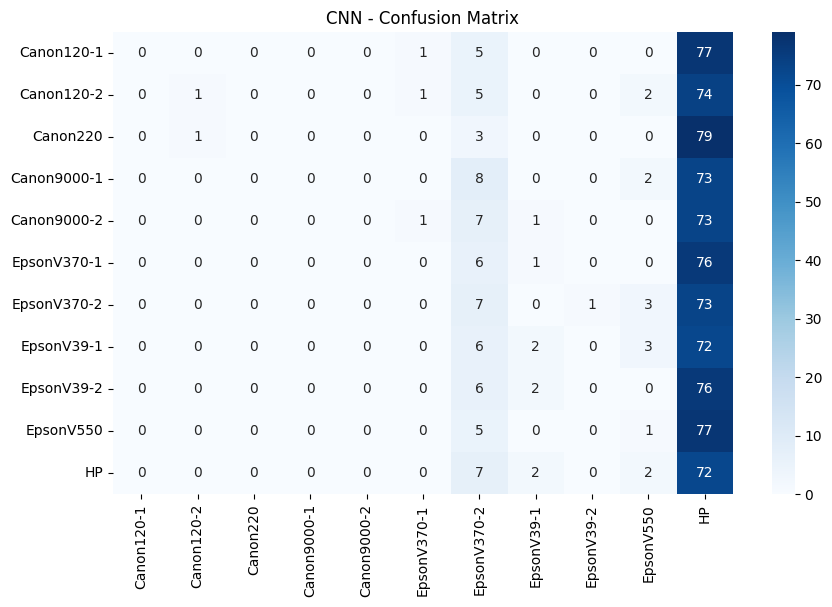

In [ ]:
import cv2, numpy as np
import tensorflow as tf
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

# ===========================
# Step 1: Load Images
# ===========================
X, y = [], []
for i, row in tqdm(df_scanner.iterrows(), total=len(df_scanner)):
    img = cv2.imread(row['filepath'])
    if img is None: continue
    img = cv2.resize(img, (128,128))   # resize
    img = img / 255.0                 # normalize
    X.append(img)
    y.append(row['scanner'])

X = np.array(X)
y = np.array(y)
print("✅ Image data:", X.shape, y.shape)

# ===========================
# Step 2: Train/Test Split
# ===========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

y_train_cat = to_categorical(y_train_enc)
y_test_cat = to_categorical(y_test_enc)

# ===========================
# Step 3: CNN Model
# ===========================
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# ===========================
# Step 4: Train
# ===========================
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=10,
    batch_size=32
)

# ===========================
# Step 5: Evaluate
# ===========================
loss, acc = model.evaluate(X_test, y_test_cat)
print(f"✅ CNN Test Accuracy: {acc:.4f}")

# Plot training curve
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()

# Confusion Matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = tf.math.confusion_matrix(y_test_enc, y_pred).numpy()

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("CNN - Confusion Matrix")
plt.show()


In [ ]:
# ==============================
# STEP 1: Residual + Feature Extraction (Save for Hybrid CNN + ML Models)
# ==============================

import os, cv2, pywt, pickle
import numpy as np
from tqdm import tqdm
from skimage.feature import local_binary_pattern as sk_lbp

# Paths
DATA_DIRS = {
    "Official": "/content/drive/MyDrive/dataset/Official",
    "Wikipedia": "/content/drive/MyDrive/dataset/Wikipedia"
}
SAVE_DIR = "/content/drive/MyDrive/Objective1"
os.makedirs(SAVE_DIR, exist_ok=True)

# ---- Utilities ----
def preprocess_residual_pywt(path, img_size=(256,256)):
    """Convert image to residual via wavelet denoising"""
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None
    img = cv2.resize(img, img_size)
    img = img.astype(np.float32) / 255.0
    cA, (cH, cV, cD) = pywt.dwt2(img, 'haar')
    cH.fill(0); cV.fill(0); cD.fill(0)
    den = pywt.idwt2((cA, (cH, cV, cD)), 'haar')
    return (img - den).astype(np.float32)

def corr2d(a, b):
    """Normalized correlation between 2 residuals"""
    a = a.astype(np.float32).ravel(); b = b.astype(np.float32).ravel()
    a -= a.mean(); b -= b.mean()
    d = np.linalg.norm(a)*np.linalg.norm(b)
    return float((a @ b) / d) if d != 0 else 0.0

def fft_radial_energy(img, K=6):
    """Compute FFT radial energy features"""
    f = np.fft.fftshift(np.fft.fft2(img))
    mag = np.abs(f)
    h, w = mag.shape; cy, cx = h//2, w//2
    yy, xx = np.ogrid[:h, :w]
    r = np.sqrt((yy - cy)**2 + (xx - cx)**2)
    bins = np.linspace(0, r.max(), K+1)
    feats = []
    for i in range(K):
        m = (r >= bins[i]) & (r < bins[i+1])
        feats.append(float(mag[m].mean() if m.any() else 0.0))
    return feats

def lbp_hist(img, P=8, R=1.0):
    """LBP histogram feature"""
    codes = sk_lbp((img*255).astype(np.uint8), P, R, method="uniform")
    n_bins = P + 2
    hist, _ = np.histogram(codes, bins=np.arange(n_bins+1), density=True)
    return hist.astype(np.float32).tolist()

# ---- Step 1A: Build PRNU fingerprints (scanner-wise) ----
print("📌 Building scanner fingerprints...")
scanner_fps = {}
residuals_dict = {"Official": {}, "Wikipedia": {}}

for dataset_name, base_dir in DATA_DIRS.items():
    for scanner in os.listdir(base_dir):
        scanner_path = os.path.join(base_dir, scanner)
        if not os.path.isdir(scanner_path): continue
        residuals_dict[dataset_name][scanner] = {}
        all_res = []
        for dpi in os.listdir(scanner_path):
            dpi_path = os.path.join(scanner_path, dpi)
            if not os.path.isdir(dpi_path): continue
            res_list = []
            for fname in os.listdir(dpi_path):
                fpath = os.path.join(dpi_path, fname)
                res = preprocess_residual_pywt(fpath)
                if res is not None:
                    res_list.append(res)
                    all_res.append(res)
            residuals_dict[dataset_name][scanner][dpi] = res_list
        if all_res:
            scanner_fps[scanner] = np.mean(all_res, axis=0)  # fingerprint = mean residual

# Save fingerprints + residuals
with open(os.path.join(SAVE_DIR, "scanner_fingerprints.pkl"), "wb") as f:
    pickle.dump(scanner_fps, f)
with open(os.path.join(SAVE_DIR, "official_wiki_residuals.pkl"), "wb") as f:
    pickle.dump(residuals_dict, f)
np.save(os.path.join(SAVE_DIR, "fp_keys.npy"), np.array(list(scanner_fps.keys())))

print("✅ Saved residuals and fingerprints!")

# ---- Step 1B: Build feature vectors ----
print("📌 Extracting hybrid features...")
X, y = [], []
fp_keys = list(scanner_fps.keys())

for dataset_name in ["Official", "Wikipedia"]:
    for scanner, dpi_dict in residuals_dict[dataset_name].items():
        for dpi, res_list in dpi_dict.items():
            for res in res_list:
                v_corr = [corr2d(res, scanner_fps[k]) for k in fp_keys]   # 11
                v_fft  = fft_radial_energy(res, K=6)                      # 6
                v_lbp  = lbp_hist(res, P=8, R=1.0)                        # 10
                X.append(v_corr + v_fft + v_lbp)                          # 27D vector
                y.append(scanner)

X = np.array(X, dtype=np.float32)
y = np.array(y)

np.save(os.path.join(SAVE_DIR, "scanner_hybrid_X.npy"), X)
np.save(os.path.join(SAVE_DIR, "scanner_hybrid_y.npy"), y)

print("✅ Hybrid features saved!")
print("Final shapes -> X:", X.shape, " y:", y.shape)


📌 Building scanner fingerprints...
✅ Saved residuals and fingerprints!
📌 Extracting hybrid features...
✅ Hybrid features saved!
Final shapes -> X: (4568, 27)  y: (4568,)


In [ ]:
# ==============================
# STEP 2: Hybrid CNN Training
# ==============================

import os, pickle
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

# Paths
SAVE_DIR = "/content/drive/MyDrive/Objective1"

# Load features + labels
X_feat = np.load(os.path.join(SAVE_DIR, "scanner_hybrid_X.npy"))
y = np.load(os.path.join(SAVE_DIR, "scanner_hybrid_y.npy"))

# Load residual images dictionary
with open(os.path.join(SAVE_DIR, "official_wiki_residuals.pkl"), "rb") as f:
    residuals_dict = pickle.load(f)

# ---- Build residual dataset (images aligned with features) ----
X_img = []
idx = 0
for dataset_name in ["Official", "Wikipedia"]:
    for scanner, dpi_dict in residuals_dict[dataset_name].items():
        for dpi, res_list in dpi_dict.items():
            for res in res_list:
                X_img.append(np.expand_dims(res, axis=-1))  # (256,256,1)
                idx += 1

X_img = np.array(X_img, dtype=np.float32)

print("Shapes -> Residual Images:", X_img.shape, " Features:", X_feat.shape, " Labels:", y.shape)

# ---- Encode labels ----
le = LabelEncoder()
y_int = le.fit_transform(y)
num_classes = len(le.classes_)
y_cat = to_categorical(y_int, num_classes)

# ---- Train-Test split ----
X_img_tr, X_img_te, X_feat_tr, X_feat_te, y_tr, y_te = train_test_split(
    X_img, X_feat, y_cat, test_size=0.2, random_state=42, stratify=y_int
)

# Scale features
scaler = StandardScaler()
X_feat_tr = scaler.fit_transform(X_feat_tr)
X_feat_te = scaler.transform(X_feat_te)

# Save artifacts
with open(os.path.join(SAVE_DIR, "hybrid_label_encoder.pkl"), "wb") as f:
    pickle.dump(le, f)
with open(os.path.join(SAVE_DIR, "hybrid_feat_scaler.pkl"), "wb") as f:
    pickle.dump(scaler, f)

# ---- Hybrid Model ----
img_in  = keras.Input(shape=(256,256,1), name="residual")
feat_in = keras.Input(shape=(27,),      name="handcrafted")

# CNN branch (image residuals)
x = layers.Conv2D(32, (3,3), padding="same", activation="relu")(img_in)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Conv2D(64, (3,3), padding="same", activation="relu")(x)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Conv2D(128, (3,3), padding="same", activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)

# MLP branch (handcrafted features)
f = layers.Dense(64, activation="relu")(feat_in)
f = layers.Dropout(0.3)(f)

# Fusion
z = layers.Concatenate()([x, f])
z = layers.Dense(128, activation="relu")(z)
z = layers.Dropout(0.4)(z)
out = layers.Dense(num_classes, activation="softmax")(z)

model = keras.Model(inputs=[img_in, feat_in], outputs=out, name="hybrid_cnn")

# Compile
model.compile(optimizer=keras.optimizers.Adam(1e-3),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

# ---- Training ----
BATCH = 32
EPOCHS = 30

train_ds = tf.data.Dataset.from_tensor_slices(((X_img_tr, X_feat_tr), y_tr))\
    .shuffle(len(y_tr)).batch(BATCH).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices(((X_img_te, X_feat_te), y_te))\
    .batch(BATCH).prefetch(tf.data.AUTOTUNE)

callbacks = [
    keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, monitor="val_accuracy"),
    keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3, monitor="val_accuracy"),
    keras.callbacks.ModelCheckpoint(os.path.join(SAVE_DIR, "scanner_hybrid.keras"),
                                    save_best_only=True, monitor="val_accuracy")
]

history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds, callbacks=callbacks, verbose=1)

# Save final model
model.save(os.path.join(SAVE_DIR, "scanner_hybrid_final.keras"))
print("✅ Hybrid CNN training complete!")


Shapes -> Residual Images: (4568, 256, 256, 1)  Features: (4568, 27)  Labels: (4568,)


Model: "hybrid_cnn"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ residual            │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        320 │ residual[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ handcrafted         │ (None, 27)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      1,792 │ handcrafted[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ conv2d_2[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 192)       │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     24,704 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 11)        │      1,419 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 120,587 (471.04 KB)

 Trainable params: 120,587 (471.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 571s 5s/step - accuracy: 0.2050 - loss: 2.1776 - val_accuracy: 0.4551 - val_loss: 1.5113 - learning_rate: 0.0010
Epoch 2/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 561s 5s/step - accuracy: 0.3849 - loss: 1.5751 - val_accuracy: 0.5219 - val_loss: 1.2860 - learning_rate: 0.0010
Epoch 3/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 556s 5s/step - accuracy: 0.4386 - loss: 1.3887 - val_accuracy: 0.5175 - val_loss: 1.1721 - learning_rate: 0.0010
Epoch 4/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 558s 5s/step - accuracy: 0.4839 - loss: 1.2734 - val_accuracy: 0.5996 - val_loss: 1.0795 - learning_rate: 0.0010
Epoch 5/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 540s 5s/step - accuracy: 0.4991 - loss: 1.2343 - val_accuracy: 0.5974 - val_loss: 1.0308 - learning_rate: 0.0010
Epoch 6/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 542s 5s/step - accuracy: 0.5349 - loss: 1.1281 - val_accuracy: 0.6039 - val_loss: 0.9790 - learning_rate: 0.0010
Epoch 7/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 539s 5s/step - accuracy: 0.5556 - loss: 1.

29/29 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step


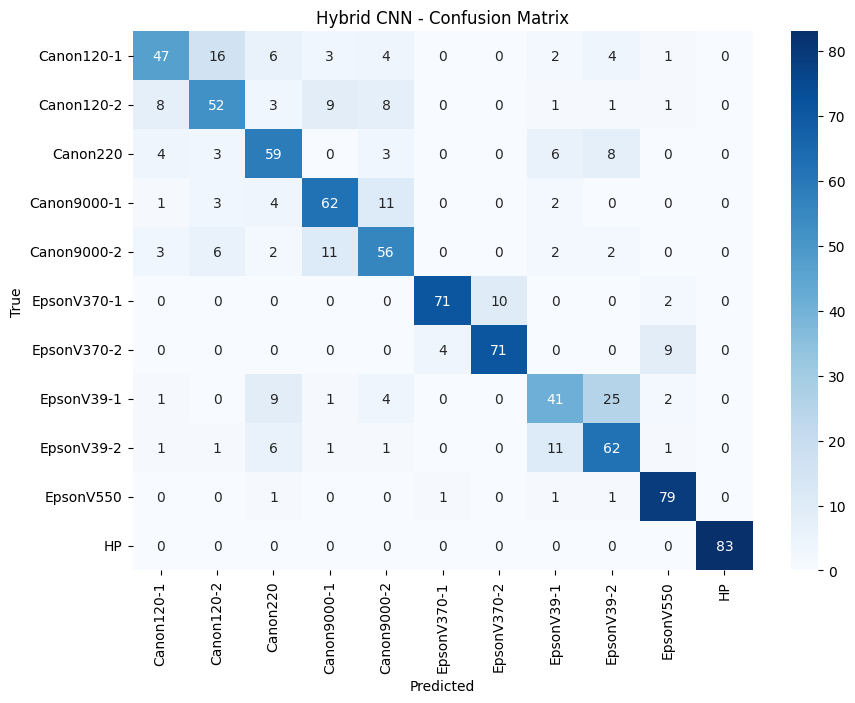

✅ Hybrid CNN Test Accuracy: 0.7473


In [ ]:
import numpy as np, pickle, os, seaborn as sns, matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

SAVE_DIR = "/content/drive/MyDrive/Objective1"

# Load saved data
X_feat = np.load(os.path.join(SAVE_DIR, "scanner_hybrid_X.npy"))
y = np.load(os.path.join(SAVE_DIR, "scanner_hybrid_y.npy"))
with open(os.path.join(SAVE_DIR, "official_wiki_residuals.pkl"), "rb") as f:
    residuals_dict = pickle.load(f)

# Rebuild residual images (aligned order)
X_img = []
for dataset_name in ["Official", "Wikipedia"]:
    for scanner, dpi_dict in residuals_dict[dataset_name].items():
        for dpi, res_list in dpi_dict.items():
            for res in res_list:
                X_img.append(np.expand_dims(res, axis=-1))
X_img = np.array(X_img, dtype=np.float32)

# Encode labels
with open(os.path.join(SAVE_DIR, "hybrid_label_encoder.pkl"), "rb") as f:
    le = pickle.load(f)
y_int = le.transform(y)
y_cat = to_categorical(y_int, len(le.classes_))

# Split same as training
X_img_tr, X_img_te, X_feat_tr, X_feat_te, y_tr, y_te = train_test_split(
    X_img, X_feat, y_cat, test_size=0.2, random_state=42, stratify=y_int
)

# Scale features
with open(os.path.join(SAVE_DIR, "hybrid_feat_scaler.pkl"), "rb") as f:
    scaler = pickle.load(f)
X_feat_te = scaler.transform(X_feat_te)

# Load trained model
model = tf.keras.models.load_model(os.path.join(SAVE_DIR, "scanner_hybrid_final.keras"))

# Predictions
y_pred = model.predict([X_img_te, X_feat_te])
y_true = np.argmax(y_te, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Hybrid CNN - Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.show()

# Final accuracy
acc = np.mean(y_true == y_pred_classes)
print(f"✅ Hybrid CNN Test Accuracy: {acc:.4f}")


In [ ]:
import os, pickle, numpy as np

SAVE_DIR = "/content/drive/MyDrive/Objective1"

# Load residuals dictionary
with open(os.path.join(SAVE_DIR, "official_wiki_residuals.pkl"), "rb") as f:
    residuals_dict = pickle.load(f)

# Build residual dataset
X_img = []
for dataset_name in ["Official", "Wikipedia"]:
    for scanner, dpi_dict in residuals_dict[dataset_name].items():
        for dpi, res_list in dpi_dict.items():
            for res in res_list:
                X_img.append(np.expand_dims(res, axis=-1))  # (256,256,1)

X_img = np.array(X_img, dtype=np.float32)

# Save
np.save(os.path.join(SAVE_DIR, "X_img.npy"), X_img)
print("✅ Saved X_img.npy with shape:", X_img.shape)


✅ Saved X_img.npy with shape: (4568, 256, 256, 1)


In [ ]:

import os
import pandas as pd

DATASET_PATH = "/content/drive/MyDrive/dataset/Tampered images"

records = []

for label, folder in [(0, "Original"), (1, "Tampered")]:
    folder_path = os.path.join(DATASET_PATH, folder)
    for root, _, files in os.walk(folder_path):
        for f in files:
            if f.lower().endswith((".jpg", ".jpeg", ".png", ".tif")):
                records.append({
                    "filepath": os.path.join(root, f),
                    "label": label
                })

df_tamper = pd.DataFrame(records)
print(df_tamper.head())
print("\nTotal images:", len(df_tamper))
print("Original count:", (df_tamper['label']==0).sum())
print("Tampered count:", (df_tamper['label']==1).sum())


                                            filepath  label
0  /content/drive/MyDrive/dataset/Tampered images...      0
1  /content/drive/MyDrive/dataset/Tampered images...      0
2  /content/drive/MyDrive/dataset/Tampered images...      0
3  /content/drive/MyDrive/dataset/Tampered images...      0
4  /content/drive/MyDrive/dataset/Tampered images...      0

Total images: 169
Original count: 34
Tampered count: 135


/tmp/ipython-input-540087892.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df_tamper, palette="Set2")


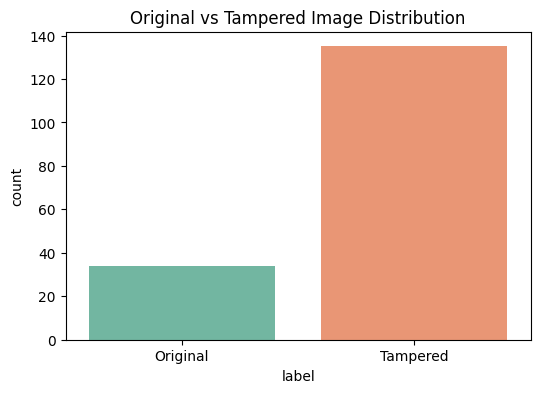

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x="label", data=df_tamper, palette="Set2")
plt.xticks([0,1], ["Original", "Tampered"])
plt.title("Original vs Tampered Image Distribution")
plt.show()


In [ ]:
import cv2
import numpy as np
import os
from tqdm import tqdm

# Dataset dataframe -> df_tamper (already created earlier)
# It contains:
#   filepath = image location
#   label    = 0 (Original), 1 (Tampered)

X = []   # will store image features
y = []   # will store labels (0 or 1)

for i, row in tqdm(df_tamper.iterrows(), total=len(df_tamper)):
    # Step 1: Read the image in grayscale
    img = cv2.imread(row['filepath'], cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue   # skip if file not found or unreadable

    # Step 2: Resize all images to fixed size (256x256)
    img = cv2.resize(img, (256,256))

    # Step 3: Denoising → remove smooth content to highlight noise
    denoised = cv2.GaussianBlur(img, (5,5), 0)

    # Step 4: Residual = original - denoised (scanner/tamper noise pattern)
    residual = cv2.subtract(img, denoised)

    # Step 5: Apply FFT (Fast Fourier Transform) on residual
    fft = np.fft.fft2(residual)          # frequency transform
    fft_shift = np.fft.fftshift(fft)     # shift zero freq to center
    magnitude_spectrum = np.abs(fft_shift)  # get magnitude

    # Step 6: Flatten FFT to a 1D feature vector (take first 5000 values for speed)
    feature = magnitude_spectrum.flatten()[:5000]

    # Step 7: Append features and label
    X.append(feature)
    y.append(row['label'])

# Convert list to numpy arrays
X = np.array(X)
y = np.array(y)

print("✅ Feature matrix shape:", X.shape)   # rows = images, cols = features
print("✅ Labels shape:", y.shape)

# Step 8: Save features for later model training
np.save("/content/drive/MyDrive/forgery_X.npy", X)
np.save("/content/drive/MyDrive/forgery_y.npy", y)


100%|██████████| 169/169 [06:26<00:00,  2.28s/it]

✅ Feature matrix shape: (169, 5000)
✅ Labels shape: (169,)


In [ ]:
import os

print(os.path.exists("/content/drive/MyDrive/forgery_X.npy"))
print(os.path.exists("/content/drive/MyDrive/forgery_y.npy"))


True
True


In [ ]:
import numpy as np

X = np.load("/content/drive/MyDrive/forgery_X.npy")
y = np.load("/content/drive/MyDrive/forgery_y.npy")

print("Loaded features:", X.shape)
print("Loaded labels:", y.shape)


Loaded features: (169, 5000)
Loaded labels: (169,)


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print("Balanced dataset:", X_res.shape, y_res.shape)


Balanced dataset: (270, 5000) (270,)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load saved features
X = np.load("/content/drive/MyDrive/forgery_X.npy")
y = np.load("/content/drive/MyDrive/forgery_y.npy")

print("Loaded features:", X.shape)
print("Loaded labels:", y.shape)

# Step 1: Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Train a baseline SVM classifier
svm = SVC(kernel="linear", probability=True, random_state=42)
svm.fit(X_train, y_train)

# Step 3: Evaluate
y_pred = svm.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Loaded features: (169, 5000)
Loaded labels: (169,)
✅ Accuracy: 0.38235294117647056

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.65      0.48      0.55        27

    accuracy                           0.38        34
   macro avg       0.33      0.24      0.28        34
weighted avg       0.52      0.38      0.44        34



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import numpy as np

# Load saved features & labels
X = np.load("/content/drive/MyDrive/forgery_X.npy")
y = np.load("/content/drive/MyDrive/forgery_y.npy")

print("Loaded features:", X.shape)
print("Loaded labels:", y.shape)

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Balance training data using SMOTE (only training data!)
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", X_train.shape, y_train.shape)
print("After SMOTE:", X_train_bal.shape, y_train_bal.shape)

# Step 3: Train SVM model on balanced data
clf = SVC(kernel="linear", random_state=42)
clf.fit(X_train_bal, y_train_bal)

# Step 4: Evaluate on test set
y_pred = clf.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Loaded features: (169, 5000)
Loaded labels: (169,)
Before SMOTE: (135, 5000) (135,)
After SMOTE: (216, 5000) (216,)
✅ Accuracy: 0.35294117647058826

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.63      0.44      0.52        27

    accuracy                           0.35        34
   macro avg       0.32      0.22      0.26        34
weighted avg       0.50      0.35      0.41        34



In [ ]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
from tqdm import tqdm
import os

# Parameters for LBP
radius = 2
n_points = 8 * radius

X = []
y = []

for i, row in tqdm(df_tamper.iterrows(), total=len(df_tamper)):
    img = cv2.imread(row['filepath'], cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue

    # Resize to fixed size
    img = cv2.resize(img, (256,256))

    # -------- Residual for FFT --------
    denoised = cv2.GaussianBlur(img, (5,5), 0)
    residual = cv2.subtract(img, denoised)

    # FFT
    fft = np.fft.fft2(residual)
    fft_shift = np.fft.fftshift(fft)
    magnitude_spectrum = np.abs(fft_shift).flatten()[:3000]  # first 3000 values

    # -------- LBP Feature --------
    lbp = local_binary_pattern(img, n_points, radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),
                             bins=np.arange(0, n_points + 3),
                             range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)  # normalize

    # -------- Combine FFT + LBP --------
    feature = np.hstack([magnitude_spectrum, hist])  # merge vectors

    X.append(feature)
    y.append(row['label'])

X = np.array(X)
y = np.array(y)

print("✅ Feature matrix shape:", X.shape)
print("✅ Labels shape:", y.shape)

# Save for training later
np.save("/content/drive/MyDrive/forgery_X_combined.npy", X)
np.save("/content/drive/MyDrive/forgery_y_combined.npy", y)


100%|██████████| 169/169 [00:38<00:00,  4.36it/s]


✅ Feature matrix shape: (169, 3018)
✅ Labels shape: (169,)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load combined features
X = np.load("/content/drive/MyDrive/forgery_X_combined.npy")
y = np.load("/content/drive/MyDrive/forgery_y_combined.npy")

print("Loaded features:", X.shape)
print("Loaded labels:", y.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# SVM classifier (good for high-dimensional features)
clf = SVC(kernel="linear", probability=True, random_state=42)

# Train
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Loaded features: (169, 3018)
Loaded labels: (169,)
✅ Accuracy: 0.3235294117647059

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.61      0.41      0.49        27

    accuracy                           0.32        34
   macro avg       0.31      0.20      0.24        34
weighted avg       0.49      0.32      0.39        34



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Load saved features
X = np.load("/content/drive/MyDrive/forgery_X.npy")
y = np.load("/content/drive/MyDrive/forgery_y.npy")

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# RandomForest with class imbalance handling
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.7647058823529411

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.79      0.96      0.87        27

    accuracy                           0.76        34
   macro avg       0.39      0.48      0.43        34
weighted avg       0.63      0.76      0.69        34



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Load features and labels (agar already saved hain)
X = np.load("/content/drive/MyDrive/forgery_X.npy")
y = np.load("/content/drive/MyDrive/forgery_y.npy")

print("Loaded features:", X.shape)
print("Loaded labels:", y.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Random Forest with balanced class weight
rf = RandomForestClassifier(
    n_estimators=200,        # number of trees
    max_depth=15,           # limit depth to avoid overfitting
    class_weight="balanced", # balance Original vs Tampered
    random_state=42
)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Loaded features: (169, 5000)
Loaded labels: (169,)
✅ Accuracy: 0.7647058823529411

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.79      0.96      0.87        27

    accuracy                           0.76        34
   macro avg       0.39      0.48      0.43        34
weighted avg       0.63      0.76      0.69        34



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Step 1: Load saved features
X = np.load("/content/drive/MyDrive/forgery_X.npy")
y = np.load("/content/drive/MyDrive/forgery_y.npy")
print("Loaded features:", X.shape)
print("Loaded labels:", y.shape)

# Step 2: Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Before SMOTE:", X_train.shape, y_train.shape)

# Step 3: Apply SMOTE (synthetic oversampling for minority class)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("After SMOTE:", X_train_res.shape, y_train_res.shape)

# Step 4: Train RandomForest with class_weight balanced
clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    class_weight="balanced",
    random_state=42
)
clf.fit(X_train_res, y_train_res)

# Step 5: Evaluate
y_pred = clf.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Loaded features: (169, 5000)
Loaded labels: (169,)
Before SMOTE: (135, 5000) (135,)
After SMOTE: (216, 5000) (216,)
✅ Accuracy: 0.47058823529411764

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.70      0.59      0.64        27

    accuracy                           0.47        34
   macro avg       0.35      0.30      0.32        34
weighted avg       0.55      0.47      0.51        34



In [ ]:
import cv2
import numpy as np
import os
from tqdm import tqdm
from skimage.feature import local_binary_pattern

# Parameters for LBP
radius = 2
n_points = 8 * radius
METHOD = 'uniform'

X_lbp = []
y_lbp = []

for i, row in tqdm(df_tamper.iterrows(), total=len(df_tamper)):
    # Step 1: Read image
    img = cv2.imread(row['filepath'], cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue

    # Step 2: Resize
    img = cv2.resize(img, (256,256))

    # Step 3: Extract LBP
    lbp = local_binary_pattern(img, n_points, radius, METHOD)

    # Step 4: Histogram (LBP pattern distribution)
    hist, _ = np.histogram(lbp.ravel(),
                           bins=np.arange(0, n_points+3),
                           range=(0, n_points+2))

    # Normalize histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)

    # Step 5: Save feature + label
    X_lbp.append(hist)
    y_lbp.append(row['label'])

# Convert to numpy arrays
X_lbp = np.array(X_lbp)
y_lbp = np.array(y_lbp)

print("✅ LBP Feature shape:", X_lbp.shape)
print("✅ Labels shape:", y_lbp.shape)

# Save features
np.save("/content/drive/MyDrive/forgery_X_lbp.npy", X_lbp)
np.save("/content/drive/MyDrive/forgery_y_lbp.npy", y_lbp)


100%|██████████| 169/169 [00:31<00:00,  5.44it/s]

✅ LBP Feature shape: (169, 18)
✅ Labels shape: (169,)


In [ ]:
# Combine FFT + LBP
X_combined = np.hstack([X_fft, X_lbp])
y = y_fft  # common labels

print("Combined feature shape:", X_combined.shape)


NameError: name 'X_fft' is not defined

In [ ]:
import numpy as np

# Load FFT features (jo pehle save kiye the)
X_fft = np.load("/content/drive/MyDrive/forgery_X.npy")
y_fft = np.load("/content/drive/MyDrive/forgery_y.npy")

# Load LBP features (agar tu ne save kiya tha)
X_lbp = np.load("/content/drive/MyDrive/forgery_X_lbp.npy")
y_lbp = np.load("/content/drive/MyDrive/forgery_y_lbp.npy")

print("FFT:", X_fft.shape, y_fft.shape)
print("LBP:", X_lbp.shape, y_lbp.shape)

# ✅ Ensure labels are same
assert np.array_equal(y_fft, y_lbp), "⚠️ Labels mismatch!"


FFT: (169, 5000) (169,)
LBP: (169, 18) (169,)


In [ ]:
# Combine FFT + LBP
X_combined = np.hstack([X_fft, X_lbp])
y = y_fft  # common labels

print("Combined feature shape:", X_combined.shape)


Combined feature shape: (169, 5018)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Handle imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", X_train.shape, y_train.shape)
print("After SMOTE:", X_train_res.shape, y_train_res.shape)

# Step 3: Train SVM
clf = SVC(kernel="rbf", C=10, gamma=0.001, class_weight="balanced", random_state=42)
clf.fit(X_train_res, y_train_res)

# Step 4: Evaluate
y_pred = clf.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Before SMOTE: (135, 5018) (135,)
After SMOTE: (216, 5018) (216,)
✅ Accuracy: 0.29411764705882354

Classification Report:
               precision    recall  f1-score   support

           0       0.23      1.00      0.37         7
           1       1.00      0.11      0.20        27

    accuracy                           0.29        34
   macro avg       0.61      0.56      0.28        34
weighted avg       0.84      0.29      0.23        34



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Step 1: Scale features (FFT + LBP combined)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

# Step 2: Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: Handle imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", X_train.shape, y_train.shape)
print("After SMOTE:", X_train_res.shape, y_train_res.shape)

# Step 4: SVM with Grid Search for best parameters
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_res, y_train_res)

print("Best Parameters:", grid.best_params_)

# Step 5: Evaluate best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Before SMOTE: (135, 5018) (135,)
After SMOTE: (216, 5018) (216,)
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
✅ Accuracy: 0.4117647058823529

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.67      0.52      0.58        27

    accuracy                           0.41        34
   macro avg       0.33      0.26      0.29        34
weighted avg       0.53      0.41      0.46        34



In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Step 1: Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y
)

print("Before SMOTE:", X_train.shape, y_train.shape)

# Step 2: Balance with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("After SMOTE:", X_train_res.shape, y_train_res.shape)

# Step 3: Apply PCA (reduce features from 5000+ to 200)
pca = PCA(n_components=200, random_state=42)
X_train_pca = pca.fit_transform(X_train_res)
X_test_pca = pca.transform(X_test)

print("Reduced feature shape:", X_train_pca.shape)

# Step 4: Train SVM with RBF kernel
clf = SVC(kernel='rbf', C=10, gamma=0.01, random_state=42)
clf.fit(X_train_pca, y_train_res)

# Step 5: Evaluate
y_pred = clf.predict(X_test_pca)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Before SMOTE: (135, 5018) (135,)
After SMOTE: (216, 5018) (216,)
Reduced feature shape: (216, 200)
✅ Accuracy: 0.29411764705882354

Classification Report:
               precision    recall  f1-score   support

           0       0.23      1.00      0.37         7
           1       1.00      0.11      0.20        27

    accuracy                           0.29        34
   macro avg       0.61      0.56      0.28        34
weighted avg       0.84      0.29      0.23        34



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Step 1: Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 50, 100],
    'gamma': [0.001, 0.01, 0.1, 'scale', 'auto'],
    'kernel': ['rbf']
}

# Step 2: Initialize model
svm = SVC()

# Step 3: GridSearch with cross-validation
grid = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid.fit(X_train_pca, y_train_res)

# Step 4: Best params and model
print("✅ Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_

# Step 5: Evaluate on test set
y_pred = best_model.predict(X_test_pca)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 25 candidates, totalling 125 fits
✅ Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
✅ Accuracy: 0.38235294117647056

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.65      0.48      0.55        27

    accuracy                           0.38        34
   macro avg       0.33      0.24      0.28        34
weighted avg       0.52      0.38      0.44        34



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# RandomForest model
rf = RandomForestClassifier(
    n_estimators=300,   # number of trees
    max_depth=20,      # tree depth
    class_weight="balanced",  # handle imbalance
    random_state=42
)

rf.fit(X_train_pca, y_train_res)
y_pred = rf.predict(X_test_pca)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.20588235294117646

Classification Report:
               precision    recall  f1-score   support

           0       0.21      1.00      0.34         7
           1       0.00      0.00      0.00        27

    accuracy                           0.21        34
   macro avg       0.10      0.50      0.17        34
weighted avg       0.04      0.21      0.07        34



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=len(y_train_res[y_train_res==0]) / len(y_train_res[y_train_res==1]),  # imbalance handle
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb.fit(X_train_pca, y_train_res)
y_pred = xgb.predict(X_test_pca)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:11:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.23529411764705882

Classification Report:
               precision    recall  f1-score   support

           0       0.21      1.00      0.35         7
           1       1.00      0.04      0.07        27

    accuracy                           0.24        34
   macro avg       0.61      0.52      0.21        34
weighted avg       0.84      0.24      0.13        34



In [ ]:
import pandas as pd
import os

data = []

# Original (label = 0)
original_path1 = "/content/drive/MyDrive/dataset/Originals"
original_path2 = "/content/drive/MyDrive/dataset/Tampered images/Original"

for path in [original_path1, original_path2]:
    for file in os.listdir(path):
        data.append({"filepath": os.path.join(path, file), "label": 0})

# Tampered (label = 1)
tampered_base = "/content/drive/MyDrive/dataset/Tampered images/Tampered"
for subfolder in ["Copy-move", "Retouching", "Splicing"]:
    path = os.path.join(tampered_base, subfolder)
    for file in os.listdir(path):
        data.append({"filepath": os.path.join(path, file), "label": 1})

# Create dataframe
df_tamper = pd.DataFrame(data)
print(df_tamper.head())
print("Total images:", len(df_tamper))
print("Original count:", (df_tamper['label']==0).sum())
print("Tampered count:", (df_tamper['label']==1).sum())


                                            filepath  label
0  /content/drive/MyDrive/dataset/Originals/official      0
1  /content/drive/MyDrive/dataset/Originals/wikip...      0
2  /content/drive/MyDrive/dataset/Tampered images...      0
3  /content/drive/MyDrive/dataset/Tampered images...      0
4  /content/drive/MyDrive/dataset/Tampered images...      0
Total images: 139
Original count: 36
Tampered count: 103


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
original_path1 = "/content/drive/MyDrive/dataset/Originals"
original_path2 = "/content/drive/MyDrive/dataset/Tampered images/Original"
tampered_path = "/content/drive/MyDrive/dataset/Tampered images/Tampered"

# Combine originals into one folder (temporary virtual label ke liye)
all_originals = [original_path1, original_path2]

# Image size for CNN
IMG_SIZE = (128, 128)
BATCH_SIZE = 16

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 80-20 split

# Training data
train_gen = datagen.flow_from_dataframe(
    dataframe=df_tamper,
    x_col="filepath",
    y_col="label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training"
)

# Validation data
val_gen = datagen.flow_from_dataframe(
    dataframe=df_tamper,
    x_col="filepath",
    y_col="label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation"
)


TypeError: If class_mode="binary", y_col="label" column values must be strings.

In [ ]:
# Map 0 → "Original", 1 → "Tampered"
df_tamper["label_str"] = df_tamper["label"].map({0: "Original", 1: "Tampered"})

train_gen = datagen.flow_from_dataframe(
    dataframe=df_tamper,
    x_col="filepath",
    y_col="label_str",   # 👈 use string labels
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training"
)

val_gen = datagen.flow_from_dataframe(
    dataframe=df_tamper,
    x_col="filepath",
    y_col="label_str",   # 👈 use string labels
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation"
)


Found 109 validated image filenames belonging to 2 classes.
Found 27 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 3 invalid image filename(s) in x_col="filepath". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 3 invalid image filename(s) in x_col="filepath". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN Model (128x128 input)
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")   # Binary classification (Original vs Tampered)
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 181s 27s/step - accuracy: 0.6703 - loss: 0.5279 - val_accuracy: 0.0000e+00 - val_loss: 2.0173
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9541 - loss: 0.2600 - val_accuracy: 0.0000e+00 - val_loss: 2.1293
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9475 - loss: 0.2327 - val_accuracy: 0.0000e+00 - val_loss: 2.4849
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9306 - loss: 0.2684 - val_accuracy: 0.0000e+00 - val_loss: 2.9381
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9405 - loss: 0.2458 - val_accuracy: 0.0000e+00 - val_loss: 2.4802
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9307 - loss: 0.3041 - val_accuracy: 0.0000e+00 - val_loss: 3.3173
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9355 - loss: 0.3062 - val_accuracy: 0.0000e+00 - val_loss: 2.3148
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9579 - loss: 0.2100 - val_accuracy: 0.00

In [ ]:
import os
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# ✅ Step 1: Create dataframe again
tampered_path = "/content/drive/MyDrive/dataset/Tampered images/Tampered"
original_path = "/content/drive/MyDrive/dataset/Originals"


data = []

# Tampered = label 1
for file in os.listdir(tampered_path):
    data.append({"filepath": os.path.join(tampered_path, file), "label": 1})

# Original = label 0
for file in os.listdir(original_path):
    data.append({"filepath": os.path.join(original_path, file), "label": 0})

df_tamper = pd.DataFrame(data)

# ✅ Convert numeric labels → string
df_tamper['label'] = df_tamper['label'].map({0: "Original", 1: "Tampered"})

print(df_tamper.head())

# ✅ Step 2: Train/Validation split
train_df, val_df = train_test_split(df_tamper, test_size=0.2, random_state=42, stratify=df_tamper['label'])

# ✅ Step 3: ImageDataGenerator (rescale + augmentation)
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

# ✅ Step 4: Generators
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="filepath",
    y_col="label",
    target_size=(128,128),
    class_mode="binary",
    batch_size=16
)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="filepath",
    y_col="label",
    target_size=(128,128),
    class_mode="binary",
    batch_size=16
)

# ✅ Step 5: CNN Model
model = models.Sequential([
    layers.Input(shape=(128,128,3)),
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")  # binary classification
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# ✅ Step 6: Train
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


                                            filepath     label
0  /content/drive/MyDrive/dataset/Tampered images...  Tampered
1  /content/drive/MyDrive/dataset/Tampered images...  Tampered
2  /content/drive/MyDrive/dataset/Tampered images...  Tampered
3  /content/drive/MyDrive/dataset/Originals/official  Original
4  /content/drive/MyDrive/dataset/Originals/wikip...  Original


ValueError: The test_size = 1 should be greater or equal to the number of classes = 2

In [ ]:
import os

base_path = "/content/drive/MyDrive/dataset"
print(os.listdir(base_path))


['Flatfield', 'Originals', 'Official', 'Wikipedia', 'Tampered images']


In [ ]:
import pandas as pd
import os

base_path = "/content/drive/MyDrive/dataset"

# Collect all filepaths
data = []

# ✅ Original images (multiple folders)
original_paths = [
    os.path.join(base_path, "Originals/official"),
    os.path.join(base_path, "Originals/wikipedia"),
    os.path.join(base_path, "Tampered images/Original"),
]

for path in original_paths:
    for file in os.listdir(path):
        data.append({"filepath": os.path.join(path, file), "label": "Original"})

# ✅ Tampered images
tampered_path = os.path.join(base_path, "Tampered images/Tampered")
for root, dirs, files in os.walk(tampered_path):
    for file in files:
        data.append({"filepath": os.path.join(root, file), "label": "Tampered"})

# ✅ Create DataFrame
df_tamper = pd.DataFrame(data)

print(df_tamper.head())
print("Total images:", len(df_tamper))
print("Original count:", (df_tamper['label']=="Original").sum())
print("Tampered count:", (df_tamper['label']=="Tampered").sum())


                                            filepath     label
0  /content/drive/MyDrive/dataset/Originals/offic...  Original
1  /content/drive/MyDrive/dataset/Originals/offic...  Original
2  /content/drive/MyDrive/dataset/Originals/offic...  Original
3  /content/drive/MyDrive/dataset/Originals/offic...  Original
4  /content/drive/MyDrive/dataset/Originals/offic...  Original
Total images: 377
Original count: 242
Tampered count: 135


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ✅ Split dataset (80% train, 20% validation)
train_df, val_df = train_test_split(
    df_tamper,
    test_size=0.2,
    random_state=42,
    stratify=df_tamper['label']
)

print("Train size:", len(train_df))
print("Validation size:", len(val_df))

# ✅ Image generators (rescale + augmentation on training)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# ✅ Training generator
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="filepath",
    y_col="label",
    target_size=(128,128),
    batch_size=16,
    class_mode="binary"
)

# ✅ Validation generator
val_gen = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="filepath",
    y_col="label",
    target_size=(128,128),
    batch_size=16,
    class_mode="binary"
)


Train size: 301
Validation size: 76
Found 134 validated image filenames belonging to 2 classes.
Found 35 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 167 invalid image filename(s) in x_col="filepath". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 41 invalid image filename(s) in x_col="filepath". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


9/9 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - accuracy: 0.7619 - loss: 0.6041 - val_accuracy: 0.7714 - val_loss: 0.5106
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7893 - loss: 0.5381 - val_accuracy: 0.7714 - val_loss: 0.5046
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8329 - loss: 0.4516 - val_accuracy: 0.7714 - val_loss: 0.4971
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8473 - loss: 0.4309 - val_accuracy: 0.7714 - val_loss: 0.4993
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8097 - loss: 0.5012 - val_accuracy: 0.7714 - val_loss: 0.5031
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8165 - loss: 0.4457 - val_accuracy: 0.7714 - val_loss: 0.4990
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7503 - loss: 0.5490 - val_accuracy: 0.7714 - val_loss: 0.6993
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7897 - loss: 0.4834 - val_accuracy: 0.7714 - val_loss: 0.5126
Epoch 9/10
9/9 ━━━━

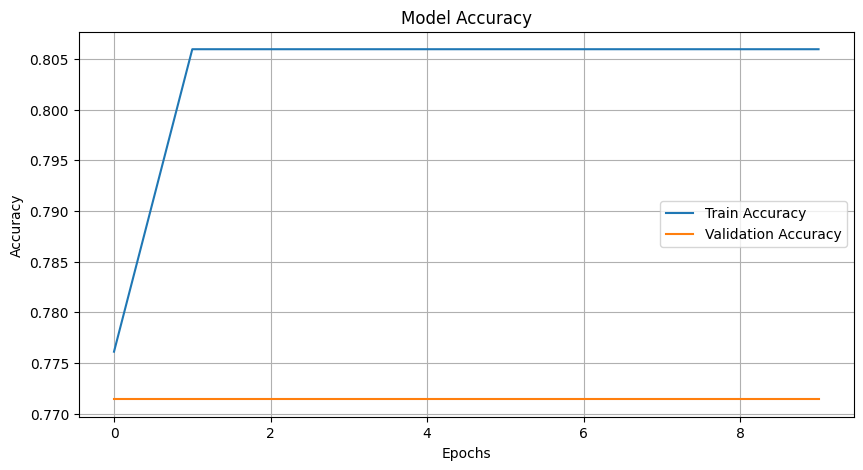

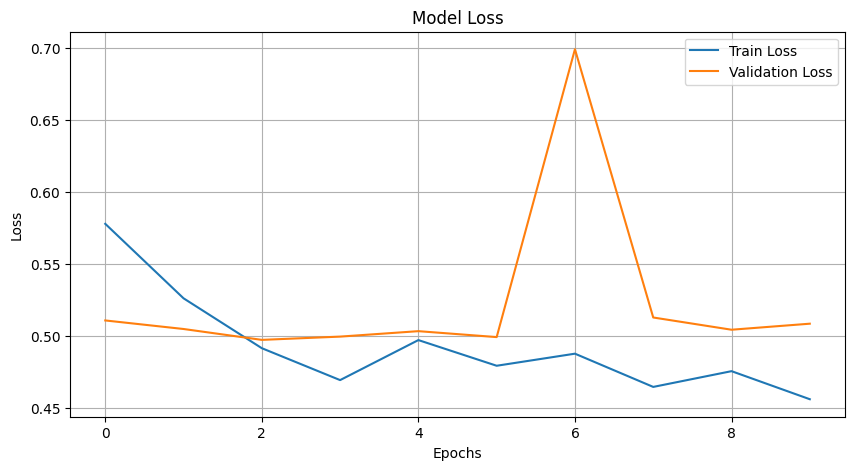

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


label
Original    208
Tampered    135
Name: count, dtype: int64
Found 108 validated image filenames belonging to 1 classes.
Found 27 validated image filenames belonging to 1 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 166 invalid image filename(s) in x_col="filepath". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 42 invalid image filename(s) in x_col="filepath". These filename(s) will be ignored.
  warnings.warn(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.9214 - loss: 0.2809 - val_accuracy: 1.0000 - val_loss: 0.0611
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 1.0000 - loss: 0.0450 - val_accuracy: 1.0000 - val_loss: 0.0162
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 1.0000 - loss: 0.0133 - val_accuracy: 1.0000 - val_loss: 0.0072
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 1.0000 - loss: 0.0064 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 9/

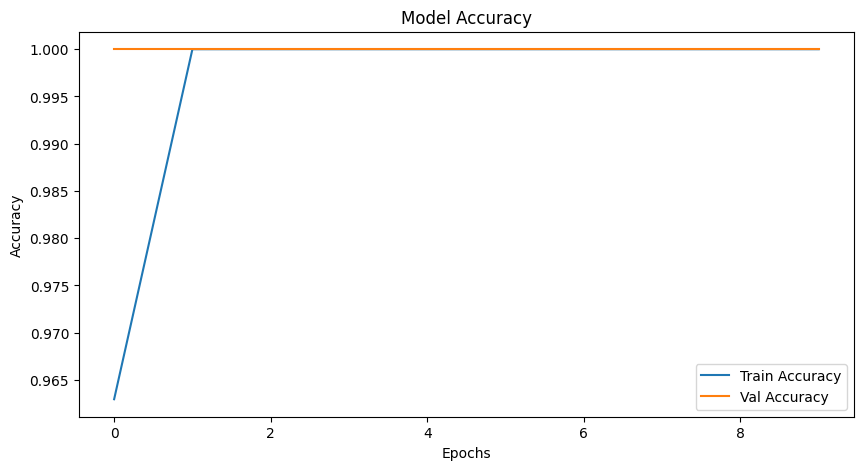

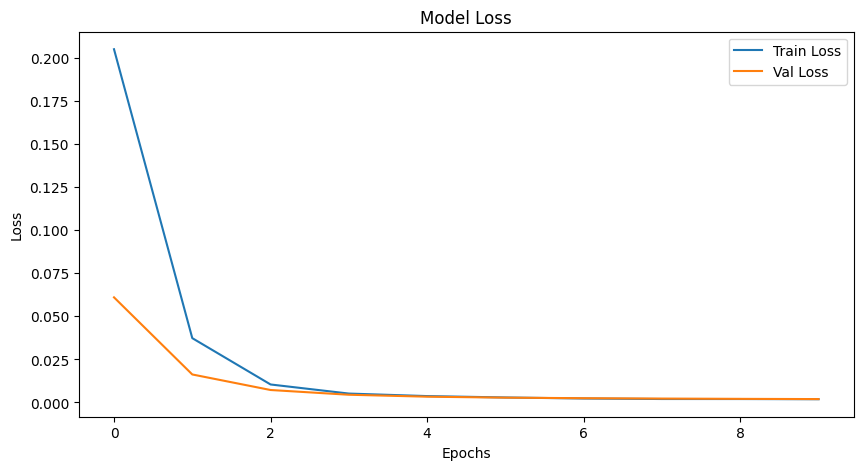

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# ✅ Step 1: Dataset paths
base_path = "/content/drive/MyDrive/dataset"
original_paths = [
    os.path.join(base_path, "Originals/official"),
    os.path.join(base_path, "Originals/wikipedia")
]
tampered_path = os.path.join(base_path, "Tampered images/Tampered")

# ✅ Step 2: Create dataframe
data = []

# Original class
for path in original_paths:
    for file in os.listdir(path):
        data.append({"filepath": os.path.join(path, file), "label": "Original"})

# Tampered class
for root, _, files in os.walk(tampered_path):
    for file in files:
        data.append({"filepath": os.path.join(root, file), "label": "Tampered"})

df_tamper = pd.DataFrame(data)
print(df_tamper['label'].value_counts())

# ✅ Step 3: Train/Val split
train_df, val_df = train_test_split(df_tamper, test_size=0.2, stratify=df_tamper['label'], random_state=42)

# ✅ Step 4: Data generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20,
                                   width_shift_range=0.1, height_shift_range=0.1,
                                   zoom_range=0.2, horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df, x_col="filepath", y_col="label",
    target_size=(224,224), batch_size=16, class_mode="binary"
)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=val_df, x_col="filepath", y_col="label",
    target_size=(224,224), batch_size=16, class_mode="binary"
)

# ✅ Step 5: MobileNetV2 base
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # freeze convolution layers

# ✅ Step 6: Custom classifier
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# ✅ Step 7: Train
history = model.fit(train_gen, validation_data=val_gen, epochs=10)

# ✅ Step 8: Plot accuracy/loss
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
model.save("/content/drive/MyDrive/mobilenet_forgery.h5")


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load trained model
model = load_model("/content/drive/MyDrive/mobilenet_forgery.h5")

# Prediction function
def predict_image(img_path):
    # Step 1: Load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))   # same size as training
    img = img / 255.0                   # normalize
    img = np.expand_dims(img, axis=0)   # add batch dimension

    # Step 2: Prediction
    pred = model.predict(img)[0][0]

    # Step 3: Threshold at 0.5
    if pred > 0.5:
        return f"Predicted: Tampered ({pred:.2f})"
    else:
        return f"Predicted: Original ({pred:.2f})"


In [ ]:
import os

# Tampered ke andar ka structure check karo
tampered_dir = "/content/drive/MyDrive/dataset/Tampered images/Tampered"
print("Folders inside Tampered:", os.listdir(tampered_dir))

# Example ek subfolder (Copy-move) ka andar first 5 files
copy_move = os.path.join(tampered_dir, "Copy-move")
print("First 5 files in Copy-move:", os.listdir(copy_move)[:5])

# Original folder check
original_dir = "/content/drive/MyDrive/dataset/Tampered images/Original"
print("First 5 files in Original:", os.listdir(original_dir)[:5])


Folders inside Tampered: ['Splicing', 'Copy-move', 'Retouching']
First 5 files in Copy-move: ['s11_41_b.tif', 's11_38_b.tif', 's11_36_b.tif', 's11_19_b.tif', 's11_29_b.tif']
First 5 files in Original: ['s9_51.tif', 's9_52.tif', 's9_56.tif', 's9_58.tif', 's9_59.tif']


In [ ]:
def predict_image(img_path):
    # Step 1: Load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))   # 🔥 change to 224x224
    img = img / 255.0                   # normalize
    img = np.expand_dims(img, axis=0)   # add batch dimension

    # Step 2: Prediction
    pred = model.predict(img)
    if pred[0][0] > 0.5:
        return "Tampered"
    else:
        return "Original"


In [ ]:
print(predict_image("/content/drive/MyDrive/dataset/Tampered images/Tampered/Splicing/s11_19_a.tif"))
print(predict_image("/content/drive/MyDrive/dataset/Tampered images/Original/s9_51.tif"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Original
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Original
